<a href="https://colab.research.google.com/github/alruizzo/missing_persons/blob/main/Desaparecidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Aplicación Especialización en Estadística Aplicada**
---



## **Factores de predicción de la aparición de personas mayores reportadas como desaparecidas**
---

![](https://www.infobae.com/new-resizer/b8r9oLLmBqIgVSsie5UGwM1nvm4=/1200x900/filters:format(jpg):quality(85)//arc-anglerfish-arc2-prod-infobae.s3.amazonaws.com/public/UFQOZRZCURB4BOIRTLM3IT2HCM.jpg)

**Por: Adriana Lucía Ruiz Rizzo**

### **1 Importar los paquetes requeridos**
---

In [ ]:
# Instalar Pycaret
!pip install pycaret

# Manejo de datos
import pandas as pd             
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight

# Manejo de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from yellowbrick.classifier import ClassificationReport

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from datetime import datetime

# Manejo de modelos
from pycaret.classification import *
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
!pip install shap
import shap

     |████████████████████████████████| 288 kB 37.0 MB/s 
     |████████████████████████████████| 2.0 MB 32.1 MB/s 
     |████████████████████████████████| 15.5 MB 25.0 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 1.7 MB 32.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 32.1 MB/s 
     |████████████████████████████████| 6.8 MB 27.9 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 113 kB 61.6 MB/s 
     |████████████████████████████████| 261 kB 57.4 MB/s 
     |████████████████████████████████| 167 kB 73.4 MB/s 
     |████████████████████████████████| 675 kB 41.5 MB/s 
     |████████████████████████████████| 303 kB 60.0 MB/s 
     |████████████████████████████████| 596 kB 58.3 MB/s 
     |████████████████

### **2 Cargar datos**
---


In [ ]:
datos = pd.read_csv("https://drive.google.com/uc?id=1GsZMWNCCHtEgZv5cHphnytM971iZxXZG")
datos

,ID,Estado de la desaparición,Clasificación de la desaparición,Fecha de la desaparición,Edad al momento de la desaparición,Sexo del desaparecido,País de nacimiento del desaparecido,Ancestro racial del desaparecido,Estado civil del desaparecido,Escolaridad del desaparecido,Factor de vulnerabilidad del desaparecido,País donde ocurre la desaparición,Municipio donde ocurre la desaparición DANE,Departamento donde ocurre la desaparición DANE,Contexto
0,1,Desaparecido,Sin Información,2006-12-29T00:00:00.000,21,Hombre,Sin información,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Sin información,Sin información,Sin información,Desaparición
1,2,Desaparecido,Sin Información,2006-12-26T00:00:00.000,24,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,"Bogotá, D.C.","Bogotá, D.C.",Desaparición
2,3,Desaparecido,Sin Información,2006-12-29T00:00:00.000,13,Mujer,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Ninguno,Colombia,"Bogotá, D.C.","Bogotá, D.C.",Desaparición
3,4,Aparecio Muerto,Sin Información,2006-12-31T00:00:00.000,50,Hombre,Colombia,Blanco,Soltero (a),Educación básica primaria,Persona adicta a una droga natural o sintética,Sin información,Sin información,Sin información,Desaparición
4,5,Aparecio Vivo,Sin Información,2006-12-29T00:00:00.000,17,Mujer,Sin información,Mestizo,Soltero (a),Educación técnica profesional y tecnológica,Ninguno,Colombia,"Bogotá, D.C.","Bogotá, D.C.",Desaparición
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162396,162397,Aparecio Vivo,Sin Información,2021-06-22T00:00:00.000,36,Hombre,Venezuela,Mestizo,Soltero (a),Educación media o secundaria alta,Ninguno,Colombia,"Bogotá, D.C.","Bogotá, D.C.",Desaparición
162397,162398,Desaparecido,Desaparición Presuntamente Forzada,2021-06-27T00:00:00.000,17,Hombre,Colombia,Mestizo,Soltero (a),Educación básica primaria,Ninguno,Colombia,Quibdó,Chocó,Desaparición
162398,162399,Desaparecido,Sin Información,2000-03-15T00:00:00.000,29,Hombre,Colombia,Mestizo,Soltero (a),Sin información,Campesinos (as) y/o trabajadores (as) del campo,Colombia,Tibú,Norte de Santander,Desaparición
162399,162400,Desaparecido,Sin Información,2021-06-29T00:00:00.000,33,Hombre,Colombia,Sin Información,Soltero (a),Educación media o secundaria alta,Ninguno,Colombia,Cúcuta,Norte de Santander,Desaparición


### **3 Revisar los datos**
---

In [ ]:
# Tipo de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162401 entries, 0 to 162400
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   ID                                              162401 non-null  int64 
 1   Estado de la desaparición                       162401 non-null  object
 2   Clasificación de la desaparición                162401 non-null  object
 3   Fecha de la desaparición                        162401 non-null  object
 4   Edad al momento de la desaparición              162401 non-null  object
 5   Sexo del desaparecido                           162401 non-null  object
 6   País de nacimiento del desaparecido             162401 non-null  object
 7   Ancestro racial del desaparecido                162401 non-null  object
 8   Estado civil del desaparecido                   162401 non-null  object
 9   Escolaridad del desaparecido         

In [ ]:
# Listar variables para ajustar sus nombres
datos.columns

Index(['ID', 'Estado de la desaparición', 'Clasificación de la desaparición',
       'Fecha de la desaparición', 'Edad al momento de la desaparición',
       'Sexo del desaparecido', 'País de nacimiento del desaparecido',
       'Ancestro racial del desaparecido', 'Estado civil del desaparecido',
       'Escolaridad del desaparecido',
       'Factor de vulnerabilidad del desaparecido',
       'País donde ocurre la desaparición',
       'Municipio donde ocurre la desaparición DANE',
       'Departamento donde ocurre la desaparición DANE', 'Contexto'],
      dtype='object')

In [ ]:
# Simplificar (y cambiar) los nombres de las variables
datos.columns = ['ID', 'status', 'clasificacion',
       'fecha', 'edad', 'sexo', 'pais_nac', 'ancestro', 'estado_civil',
       'escolaridad', 'vulnerabilidad', 'pais_desap',
       'munic_desap_DANE', 'dept_desap_DANE', 'contexto']
datos.columns

Index(['ID', 'status', 'clasificacion', 'fecha', 'edad', 'sexo', 'pais_nac',
       'ancestro', 'estado_civil', 'escolaridad', 'vulnerabilidad',
       'pais_desap', 'munic_desap_DANE', 'dept_desap_DANE', 'contexto'],
      dtype='object')

### **4 Eliminar registros sin información de las variables más relevantes**
---

#### **a. Edad**
*La edad es importante porque a mayor edad se espera menor probabilidad de aparecer vivo*

- Aquí es importante mencionar que se deciden eliminar aquellos registros para los cuales no se tenga información de edad, ya que la edad es la variable más importante para el pronóstico de aparición.

In [ ]:
# Revisar valores únicos de edad para hacerse a una idea de los ajustes necesarios
datos.edad.unique()

array(['21', '24', '13', '50', '17', '41', '71', '25', '20', '35', '15',
       '54', '40', '29', '28', '14', '55', '19', '27', '39', '47', '45',
       '36', '87', '44', '43', '56', '11', '31', '22', '63', '48', '18',
       '16', '38', '58', '70', '23', '33', '30', '62', '42', '100', '52',
       '12', '72', '74', '7', '26', '9', '32', '46', '34', '51', '8',
       '53', '79', '76', '49', '5', '57', '10', '60', '65', '78', '69',
       '84', '83', '6', '64', '73', '82', '59', '68', '67', '66', '80',
       '37', '75', '77', '88', '1.083', '86', '2', '85', '0.083', '94',
       '4', '1.25', '0.583', '0.333', '81', '89', '3', '0.666', '61',
       '0.166', '0.25', '1.5', '0.916', 'Sin información', '0.416', '1',
       '91', '0.5', '90', '95', '99', '101', '0', '103', '1.666', '96',
       '93', '98', '92', '97', '0.833', '0.75', '1.583', '104', '1.333',
       '1.833', '1.416', '1.75', '1.916', '1.166', '110', '2.75', '112',
       '102', '2.083', '107', '2.916', '108', '3.333', '4.33

In [ ]:
# Seleccionar registros con valores de edad (determinar cuántos son faltantes)
InfoEdad = datos["edad"] != 'Sin información'
len(datos[InfoEdad])                          # n = 202 no tienen info de edad

162199

#### **b. Fecha de desaparición**
*La fecha de desaparición es importante porque a mayor antigüedad se espera una menor probabilidad de aparecer vivo.*

- Al igual que con edad, se deciden eliminar aquellos registros para los cuales no se tiene información de la fecha de desaparición, ya que ésta es otra de las variables más críticas para el pronóstico de aparición.

In [ ]:
# Revisar valores únicos de fecha para hacerse una idea de cómo deberían ajustarse
datos.fecha.unique()

array(['2006-12-29T00:00:00.000', '2006-12-26T00:00:00.000',
       '2006-12-31T00:00:00.000', ..., '2021-06-28T00:00:00.000',
       '2021-06-29T00:00:00.000', '2021-06-30T00:00:00.000'], dtype=object)

In [ ]:
# Seleccionar registros con valores de fecha (determinar cuántos son faltantes)
InfoFecha = datos["fecha"] != 'Sin información'
len(datos[InfoFecha])                         # n = 129 no tienen info de año

162272

#### **c. Clasificación de la desaparición**
*La clasificación de la desaparición es relevante en el presente trabajo porque una desaparición (presuntamente) forzada está por fuera de los factores intrínsecos y extrínsicos que se cree podrían influir en la probabilidad de aparición.*

- Se identifican los registros para los cuales se sospecha una desaparición forzada para después excluirlos.
- Los registros que no tienen información se dejan así, ya que en la mayoría de los casos se desconocen las verdaderas causas de la desaparición.

In [ ]:
# Seleccionar registros que no corresponden a desaparición presuntamente forzada
InfoClasif = datos.clasificacion != 'Desaparición Presuntamente Forzada' 
len(datos[InfoClasif])                       # n = 32403 tienen clasificación
                                             # presuntamente forzada

129998

In [ ]:
# Revisar valores únicos de clasificación de la desaparición
datos.clasificacion.unique()

array(['Sin Información', 'Desaparición Presuntamente Forzada'],
      dtype=object)

#### **Filtro**

- Se eliminan los datos sin información en las variables más importantes (edad y fecha de desaparición) y aquellos con presunta clasificación de desaparición como forzada.

In [ ]:
# Hasta aquí podemos filtrar aquellos registros seleccionados anteriormente
datos = datos[InfoEdad & InfoFecha & InfoClasif]
len(datos)                                      # n = 129776

129776

- Se eliminan las variables redundantes o que no se necesitan en el modelo

In [ ]:
# Eliminar variables que no se necesitan o son redundantes con otras variables
datos.drop(['contexto',         # redundante con clasificacion
            'clasificacion',    # sólo tiene una clase
            'pais_nac',         # no se considera relevante
            'ancestro'],        # no se considera relevante
           1, inplace = True)

- Se dejan sólo los registros de interés: personas con edad >= 60 años al momento de la desaparición y personas con status de "desaparecido" o "apareció vivo".

In [ ]:
# Primero, se ajusta el tipo de las variable
datos['edad'] = datos.edad.astype('float').astype('int')
filtro_edad = datos['edad'] >= 60
filtro_status = datos["status"] != 'Aparecio Muerto'
datos = datos[filtro_edad & filtro_status]
len(datos)                                    # n = 7904

7904

- Se eliminan los registros cuyo país de desaparición no sea Colombia

In [ ]:
# Dejamos sólo las desapariciones ocurridas en Colombia, ya que es menos
# probable que conozcamos con certeza el desenlace de la desaparición
# cuando ésta ocurrió en otro país y eliminamos después esa columna
desap_col = datos["pais_desap"] == 'Colombia'
datos = datos[desap_col]
datos = datos.drop("pais_desap", 1)
len(datos)                            # n = 7855
datos

,ID,status,fecha,edad,sexo,estado_civil,escolaridad,vulnerabilidad,munic_desap_DANE,dept_desap_DANE
34,35,Desaparecido,2006-12-12T00:00:00.000,87,Hombre,Soltero (a),Educación básica primaria,Otro,"Bogotá, D.C.","Bogotá, D.C."
46,47,Desaparecido,2006-12-25T00:00:00.000,63,Mujer,Soltero (a),Educación básica primaria,Ninguno,"Bogotá, D.C.","Bogotá, D.C."
68,69,Desaparecido,2006-12-02T00:00:00.000,70,Hombre,Casado (a),Educación básica primaria,Ninguno,"Bogotá, D.C.","Bogotá, D.C."
90,91,Aparecio Vivo,2007-01-04T00:00:00.000,62,Hombre,Soltero (a),Educación básica primaria,Ninguno,Soledad,Atlántico
112,113,Desaparecido,2007-01-01T00:00:00.000,74,Hombre,Soltero (a),Educación básica primaria,Ninguno,Cali,Valle del Cauca
...,...,...,...,...,...,...,...,...,...,...
162234,162235,Desaparecido,2021-06-18T00:00:00.000,79,Hombre,Soltero (a),Educación básica primaria,Ninguno,"Bogotá, D.C.","Bogotá, D.C."
162243,162244,Desaparecido,2021-06-20T00:00:00.000,67,Hombre,Unión libre,Educación media o secundaria alta,Persona adicta a una droga natural o sintética,"Bogotá, D.C.","Bogotá, D.C."
162259,162260,Desaparecido,1999-05-10T00:00:00.000,60,Hombre,Casado (a),Sin escolaridad,Sin información,Coloso,Sucre
162288,162289,Desaparecido,2021-06-19T00:00:00.000,70,Mujer,Unión libre,Educación inicial y educación preescolar,Persona habitante de la calle,"Bogotá, D.C.","Bogotá, D.C."


### **5 Transformación de variables**
--- 

In [ ]:
# Primero, se verifican los tipos de variable para determinar cuáles hay que
# transformar y a qué tipo
datos.info()                # Sólo "edad" tiene el tipo "adecuado" de variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855 entries, 34 to 162382
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                7855 non-null   int64 
 1   status            7855 non-null   object
 2   fecha             7855 non-null   object
 3   edad              7855 non-null   int64 
 4   sexo              7855 non-null   object
 5   estado_civil      7855 non-null   object
 6   escolaridad       7855 non-null   object
 7   vulnerabilidad    7855 non-null   object
 8   munic_desap_DANE  7855 non-null   object
 9   dept_desap_DANE   7855 non-null   object
dtypes: int64(2), object(8)
memory usage: 675.0+ KB


#### **a. ID**
Aunque esta no será como tal una variable predictora, sí será útil para llevar rastro de los registros cuando se haga la separación de la base de datos en entrenamiento y testeo

In [ ]:
datos['ID'] = datos.ID.astype('category')
datos.ID.unique()

[35, 47, 69, 91, 113, ..., 162235, 162244, 162260, 162289, 162383]
Length: 7855
Categories (7855, int64): [35, 47, 69, 91, ..., 162244, 162260, 162289, 162383]

#### **b. Status**
Variable de salida.

In [ ]:
datos['status'] = pd.Categorical(datos.status, categories = ["Aparecio Vivo",
                                                             "Desaparecido"],
                                 ordered = False)
#datos['status'] = datos.status.astype('category')
datos.status.value_counts()            # 5166 con status desaparecido y
                                       # 2689 con status de aparecido vivo
datos.status.cat.categories

Index(['Aparecio Vivo', 'Desaparecido'], dtype='object')

#### **c. Fecha**
Como se vio en el punto anterior, la fecha puede predecir la probabilidad de aparición, ya que el reporte de desaparecidos, así como los sistemas de información para la localización de desaparecidos, ha cambiado con los años.



In [ ]:
datos['fecha'] = pd.to_datetime(datos.fecha, format = '%Y-%m-%d')
datos.fecha

34       2006-12-12
46       2006-12-25
68       2006-12-02
90       2007-01-04
112      2007-01-01
            ...    
162234   2021-06-18
162243   2021-06-20
162259   1999-05-10
162288   2021-06-19
162382   2021-05-27
Name: fecha, Length: 7855, dtype: datetime64[ns]

In [ ]:
# Número de días desde el reporte de la desaparición: utilizaremos esta variable,
# ya que muchas observaciones tendrán menos de un año desde la desaparición
datos['dias'] = datetime.strptime('2021-07-30', '%Y-%m-%d') - datos.fecha
datos['dias'] = datos.dias.astype('string').str.replace(' days', '').astype('int')

In [ ]:
# Sacamos dos variables de la variable de fecha: año y mes, para poder analizar
# su contribución al modelo predictivo por separado.
datos['mes'] = datos.fecha.dt.month        # Todos los meses están representados
datos['año'] = datos.fecha.dt.year         # 67 años únicos
datos.año.value_counts(), datos.mes.value_counts()

(2019    483
 2018    464
 2012    452
 2015    443
 2013    430
 2017    423
 2014    418
 2016    411
 2011    381
 2010    381
 2020    367
 2007    304
 2009    295
 2008    248
 2002    162
 2021    155
 2000    153
 2001    130
 2004    129
 2003    129
 2005    121
 1998    111
 1999    106
 2006    103
 1997     94
 1996     92
 1995     68
 1994     65
 1990     58
 1992     55
 1988     55
 1989     50
 1993     48
 1986     48
 1987     47
 1985     45
 1991     42
 1980     34
 1983     31
 1984     30
 1982     29
 1981     27
 1979     16
 1978     13
 1977     10
 1974      9
 1972      8
 1968      7
 1973      7
 1975      7
 1964      7
 1970      7
 1958      6
 1966      6
 1962      6
 1969      5
 1965      4
 1976      4
 1961      3
 1959      3
 1960      2
 1963      2
 1971      2
 1937      1
 1954      1
 1967      1
 1950      1
 Name: año, dtype: int64, 1     986
 12    699
 8     640
 11    639
 10    631
 4     631
 5     627
 6     623
 3     621
 7   

In [ ]:
# Podemos eliminar la columna de fecha
datos = datos.drop(columns = "fecha")

In [ ]:
# Volvemos categórica la variable mes
datos.mes = datos.mes.astype('category')
datos.mes.value_counts()

1     986
12    699
8     640
11    639
10    631
4     631
5     627
6     623
3     621
7     604
2     585
9     569
Name: mes, dtype: int64

#### **d. Sexo**
Esta es una variable importante, ya que puede estar asociada con comportamientos que hagan más o menos probable la aparición.

In [ ]:
datos['sexo'] = datos.sexo.astype('category')
datos.sexo.value_counts()         # Se observa un enorme disbalance entre hom-
                                  # bres y mujeres, ya que hay casi 4x más
                                  # hombres que mujeres.

Hombre    6249
Mujer     1606
Name: sexo, dtype: int64

#### **e. Estado civil**
Esta variable es importante porque puede reflejar el papel de la red social (representada por la presencia o no de cónyuge o la tenencia de una familia) en la búsqueda activa y posterior aparición de la persona.

In [ ]:
# Aquí podemos tener varias opciones, así que verificamos primero qué valores
# únicos hay
datos.estado_civil.unique()

array(['Soltero (a)', 'Casado (a)', 'Separado (a), Divorciado (a)',
       'Viudo (a)', 'Unión libre', 'Sin información'], dtype=object)

In [ ]:
# No necesitamos todas las categorías, pues algunas se pueden solapar, como
# por ejemplo "unión libre" y "casado" (relación actual) o "separado" y 
# "viudo" (relación pasada), las cuales cumplen la misma función para la idea
# que se tiene sobre el rol de esta variable en el pronóstico
datos['relacion'] = datos['estado_civil']\
.replace(['Unión libre', 'Casado (a)',\
          'Separado (a), Divorciado (a)', 'Viudo (a)',\
          'Soltero (a)'],\
         ['actual', 'actual', 'pasada', 'pasada', 'ninguna'])
datos.relacion.value_counts()

actual             3239
ninguna            2106
pasada             1697
Sin información     813
Name: relacion, dtype: int64

In [ ]:
# Eliminamos la columna de estado civil
datos = datos.drop(columns = "estado_civil")

In [ ]:
# Volvemos NaN los registros sin información
datos.relacion = datos.relacion.replace("Sin información", np.NaN)

In [ ]:
# Volvemos categoría esta variable
datos.relacion = datos.relacion.astype('category')

#### **f. Escolaridad**

La variable de educación es importante porque brinda una idea muy general, muy global, acerca del nivel cognitivo de la persona desaparecida. Se esperaría que una persona con mayores recursos cognitivos pueda encontrar más estrategias o medios para regresar a su origen y, por tanto, tenga mayor probabilidad de aparecer.

In [ ]:
# Primero, verificamos qué niveles están comprendidos en esta variable
datos['escolaridad'].unique()

array(['Educación básica primaria', 'Sin escolaridad',
       'Educación básica secundaria o secundaria baja',
       'Educación técnica profesional y tecnológica', 'Sin información',
       'Educación media o secundaria alta', 'Universitario',
       'Educación inicial y educación preescolar',
       'Doctorado o equivalente',
       'Especialización, Maestría o equivalente'], dtype=object)

In [ ]:
# Como los niveles educativos tienen una duración más o menos conocida, conver-
# tiremos esta variable a cuantitativa, de tal manera que refleje los años de
# educación, ya que así puede ser más útil para el modelo. Como es una escala
# aproximada (porque no sabemos exactamente los años de escolaridad), utiliza-
# remos saltos de 2.5 años, para que todos los niveles queden con la misma
# distancia y debido a que un nivel se cimienta sobre el anterior.
datos['escolaridad'] = datos.escolaridad.replace({'Sin escolaridad':0})\
                                   .replace({'Educación inicial y educación preescolar':2.5})\
                                   .replace({'Educación básica primaria':5})\
                                   .replace({'Educación básica secundaria o secundaria baja':7.5})\
                                   .replace({'Educación media o secundaria alta':10})\
                                   .replace({'Educación técnica profesional y tecnológica':12.5})\
                                   .replace({'Universitario':15})\
                                   .replace({'Especialización, Maestría o equivalente':17.5})\
                                   .replace({'Doctorado o equivalente':20})\

In [ ]:
# Verificamos la frecuencia valores en esta variable
datos['escolaridad'].value_counts()        # Hay 2063 registros sin información

5                  2981
Sin información    2077
0                   992
2.5                 608
10                  425
7.5                 423
12.5                201
15                  139
17.5                  7
20                    2
Name: escolaridad, dtype: int64

In [ ]:
# Volvemos NaN los registros sin información
datos.escolaridad = datos.escolaridad.replace("Sin información", np.NaN)

#### **g. Factor de vulnerabilidad**

Esta variable es importante porque a mayor factor de vulnerabilidad de una persona, menor puede ser su probabilidad de aparición.

In [ ]:
# Al igual que con la variable anterior, verificamos qué niveles están
# comprendidos en esta variable
datos['vulnerabilidad'].unique()

array(['Otro', 'Ninguno', 'Sin información',
       'Persona habitante de la calle',
       'Persona adicta a una droga natural o sintética',
       'Campesinos (as) y/o trabajadores (as) del campo', 'Religiosos',
       'Presunto colaborador de grupo ilegal', 'Maestro/Educador',
       'Personas que ejercen actividades políticas',
       'Persona en condición de desplazamiento',
       'Herido y/o enfermo bajo protección sanitaria o médica',
       'Grupos étnicos', 'Ex convictos (as)', 'Personas bajo custodia',
       'Comunidad LGBT', 'Líder cívico', 'Recicladores',
       'Miembros de Organizaciones No Gubernamentales (ONG)',
       'Concejales', 'Personas que ejercen actividades de periodismo',
       'Persona habitante de la calle, Persona adicta a una droga natural o sintética',
       'Personas que ejercen actividades gremiales o sindicales',
       'Personas desmovilizadas o reinsertadas',
       'Personas que ejercen actividades relacionadas con la salud en zonas de conflicto

In [ ]:
# Como hay tantos y tan variados niveles, ahora verificamos cuántos valores
# hay en cada uno para encontrar una manera de convertirlos
datos['vulnerabilidad'].value_counts()

Ninguno                                                                             4638
Sin información                                                                     1474
Otro                                                                                1089
Campesinos (as) y/o trabajadores (as) del campo                                      253
Persona adicta a una droga natural o sintética                                       141
Religiosos                                                                            51
Persona habitante de la calle                                                         51
Persona en condición de desplazamiento                                                37
Grupos étnicos                                                                        27
Discapacitados (as)                                                                   14
Herido y/o enfermo bajo protección sanitaria o médica                                 10
Ex convictos (as)    

In [ ]:
# Ya que hay números pequeños en algunos niveles de la variable, será mejor
# categorizarla en 2 niveles: sin (0) y con (1) algún factor de vulnerabilidad
filtro = (datos.vulnerabilidad != 'Ninguno') &\
(datos.vulnerabilidad != 'Sin información')
datos.loc[filtro, 'vulnerabilidad'] = 'Sí'
datos.loc[(datos.vulnerabilidad == 'Ninguno'), 'vulnerabilidad'] = 'No'
datos['vulnerabilidad'].value_counts()     # Hay 1460 registros sin información

No                 4638
Sí                 1743
Sin información    1474
Name: vulnerabilidad, dtype: int64

In [ ]:
# Volvemos NaN los registros sin información
datos.vulnerabilidad = datos.vulnerabilidad.replace("Sin información", np.NaN)

In [ ]:
# Volvemos categoría esta variable
datos.vulnerabilidad = datos.vulnerabilidad.astype('category')

#### **h. Lugar (municipio y departamento) de desaparición**

Esta variable es relevante porque nos indica qué tan favorable o no puede ser el entorno para la aparición de la persona. Se espera que áreas más urbanizadas y con mayor desarrollo aumenten la probabilidad de aparición, mientras que las áreas rurales, con menor desarrollo y más "incomunicadas" la disminuyan.

In [ ]:
# Revisamos primero los datos de esta variable: tenemos 635 datos únicos
len(datos.munic_desap_DANE.unique())      # == 635
sorted(datos.munic_desap_DANE.unique())

['Abejorral',
 'Acacías',
 'Acandí',
 'Acevedo',
 'Agua de Dios',
 'Aguachica',
 'Aguada',
 'Aguadas',
 'Aguazul',
 'Agustín Codazzi',
 'Aipe',
 'Albania',
 'Albán',
 'Alcalá',
 'Algarrobo',
 'Algeciras',
 'Almaguer',
 'Alpujarra',
 'Alvarado',
 'Amagá',
 'Amalfi',
 'Ambalema',
 'Andalucía',
 'Andes',
 'Anolaima',
 'Anorí',
 'Anserma',
 'Ansermanuevo',
 'Anzoátegui',
 'Anzá',
 'Apartadó',
 'Apulo',
 'Apía',
 'Aracataca',
 'Aratoca',
 'Arauca',
 'Arauquita',
 'Arbeláez',
 'Arboledas',
 'Arboletes',
 'Arcabuco',
 'Arenal',
 'Argelia',
 'Ariguaní',
 'Armenia',
 'Ataco',
 'Ayapel',
 'Bagadó',
 'Bahía Solano',
 'Bajo Baudó',
 'Balboa',
 'Baranoa',
 'Baraya',
 'Barbacoas',
 'Barbosa',
 'Barichara',
 'Barrancabermeja',
 'Barrancas',
 'Barranquilla',
 'Becerril',
 'Belalcázar',
 'Bello',
 'Belén',
 'Belén de Umbría',
 'Belén de los Andaquíes',
 'Betulia',
 'Bochalema',
 'Bogotá, D.C.',
 'Bojacá',
 'Bojayá',
 'Bolívar',
 'Bosconia',
 'Briceño',
 'Bucaramanga',
 'Buenaventura',
 'Buenavista',
 '

Como el nombre del municipio no dice nada, lo que haremos será reemplazar los nombres con su número de habitantes para hacernos a una idea del nivel de urbanización y desarrollo del mismo. Además, así tendremos una variable cuantitativa continua.

In [ ]:
# Utilizaremos una base de datos creada a partir de web-scraping
# de la página de Wikipedia
# (https://es.wikipedia.org/wiki/Municipios_de_Colombia) y sus respectivos
# anexos (por ejemplo: https://es.wikipedia.org/wiki/Anexo:Municipios_de_Huila)
# gracias a https://github.com/virtualmarioe/Web_scraping_tutorial:
municipios = pd.read_csv("https://drive.google.com/uc?id=1MWGzeFSmTUhuXLO3dNf-6YmhW-ajpVai")
municipios

,Unnamed: 0,index,Municipio,Departamento,Habitantes
0,0,0,El Encanto,Amazonas,4884
1,1,1,La Chorrera,Amazonas,3933
2,2,2,La Pedrera,Amazonas,5125
3,3,3,La Victoria,Amazonas,1115
4,4,4,Leticia,Amazonas,41639
...,...,...,...,...,...
1689,1689,15,Puente Aranda,Bogotá,258287
1690,1690,16,La Candelaria,Bogotá,24088
1691,1691,17,Rafael Uribe Uribe,Bogotá,374246
1692,1692,18,Ciudad Bolívar,Bogotá,733859


In [ ]:
# Limpiamos la base de datos
municipios = municipios.drop(columns=['Unnamed: 0', 'index'])
municipios

,Municipio,Departamento,Habitantes
0,El Encanto,Amazonas,4884
1,La Chorrera,Amazonas,3933
2,La Pedrera,Amazonas,5125
3,La Victoria,Amazonas,1115
4,Leticia,Amazonas,41639
...,...,...,...
1689,Puente Aranda,Bogotá,258287
1690,La Candelaria,Bogotá,24088
1691,Rafael Uribe Uribe,Bogotá,374246
1692,Ciudad Bolívar,Bogotá,733859


In [ ]:
# Hay un espacio en la columna de habitantes, por lo cual debemos eliminarlo
municipios.Habitantes[0]            # Lo visualizamos: '4\xa0884' 
municipios.Habitantes = municipios.Habitantes.replace(u'\xa0', '', regex = True)\
.replace('\.', '', regex = True)\
.replace('\D', '', regex = True)  # Para borrar espacios donde no hay dígitos
municipios

,Municipio,Departamento,Habitantes
0,El Encanto,Amazonas,4884
1,La Chorrera,Amazonas,3933
2,La Pedrera,Amazonas,5125
3,La Victoria,Amazonas,1115
4,Leticia,Amazonas,41639
...,...,...,...
1689,Puente Aranda,Bogotá,258287
1690,La Candelaria,Bogotá,24088
1691,Rafael Uribe Uribe,Bogotá,374246
1692,Ciudad Bolívar,Bogotá,733859


In [ ]:
# Necesitamos obtener la suma total de Bogotá, D.C., ya que está por localidades
# pero al intentar convertir a entero la columna hay errores debido a valores
# faltantes. Verificamos cuáles son éstos:
print(municipios[municipios['Habitantes'].isnull()])

    Municipio Departamento Habitantes
892  Altamira        Huila        NaN
893    Garzón        Huila        NaN
894   Gigante        Huila        NaN


In [ ]:
# Los buscamos manualmente por Google para agregar los valores:
municipios.Habitantes[municipios.Municipio == "Altamira"] = 4293 # Total 2015
municipios.Habitantes[municipios.Municipio == "Garzón"] = 96296  # Total 2019
municipios.Habitantes[municipios.Municipio == "Gigante"] = 34410 # Total 2020

In [ ]:
# Ahora intentamos nuevamente convertir a entero dicha columna
municipios.Habitantes = municipios.Habitantes.astype(int)
municipios.Habitantes.describe()

count    1.694000e+03
mean     4.052021e+04
std      1.258991e+05
min      3.740000e+02
25%      7.876500e+03
50%      1.482300e+04
75%      2.773700e+04
max      2.457680e+06
Name: Habitantes, dtype: float64

In [ ]:
# Añadimos "Bogotá D.C." y su total a la base de datos de municipios
total_bog = np.sum(municipios.Habitantes[municipios.Departamento=='Bogotá'])
Bogota = {'Municipio': 'Bogotá, D.C.', 'Departamento': 'Bogotá, D.C.',
          'Habitantes': total_bog}
municipios = municipios.append(Bogota, ignore_index = True)

# Eliminamos las localidades de Bogotá, ya que no las necesitamos
municipios = municipios.drop(labels = municipios.index[(municipios.Departamento == "Bogotá") &
                                                     (municipios.Municipio != "Bogotá, D.C.")])
municipios.Habitantes

0          4884
1          3933
2          5125
3          1115
4         41639
         ...   
1670      37740
1671      15886
1672      16000
1673       4076
1694    8076734
Name: Habitantes, Length: 1675, dtype: int64

In [ ]:
# Crear columna de "municipio"
datos.insert(8, column = "municipio", value = 0)

In [ ]:
# Añadimos la información sobre número de habitantes a la columna "municipio"
for fila in municipios.index:
  condicion = (municipios.Municipio[fila] == datos.munic_desap_DANE) &\
  (municipios.Departamento[fila] == datos.dept_desap_DANE)
  datos.loc[condicion, "municipio"] = municipios.Habitantes[fila]
datos

,ID,status,edad,sexo,escolaridad,vulnerabilidad,munic_desap_DANE,dept_desap_DANE,municipio,dias,mes,año,relacion
34,35,Desaparecido,87,Hombre,5.0,Sí,"Bogotá, D.C.","Bogotá, D.C.",8076734,5344,12,2006,ninguna
46,47,Desaparecido,63,Mujer,5.0,No,"Bogotá, D.C.","Bogotá, D.C.",8076734,5331,12,2006,ninguna
68,69,Desaparecido,70,Hombre,5.0,No,"Bogotá, D.C.","Bogotá, D.C.",8076734,5354,12,2006,actual
90,91,Aparecio Vivo,62,Hombre,5.0,No,Soledad,Atlántico,632014,5321,1,2007,ninguna
112,113,Desaparecido,74,Hombre,5.0,No,Cali,Valle del Cauca,2394870,5324,1,2007,ninguna
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162234,162235,Desaparecido,79,Hombre,5.0,No,"Bogotá, D.C.","Bogotá, D.C.",8076734,42,6,2021,ninguna
162243,162244,Desaparecido,67,Hombre,10.0,Sí,"Bogotá, D.C.","Bogotá, D.C.",8076734,40,6,2021,actual
162259,162260,Desaparecido,60,Hombre,0.0,NaN,Coloso,Sucre,0,8117,5,1999,actual
162288,162289,Desaparecido,70,Mujer,2.5,Sí,"Bogotá, D.C.","Bogotá, D.C.",8076734,41,6,2021,actual


In [ ]:
# Identificamos valores que no hubieran sido encontrados para agregar los
# valores de manera manual (27 valores únicos)
no_encontrados = set(datos.loc[((datos.municipio == 0) \
           &(datos.munic_desap_DANE != 'Sin información')), "munic_desap_DANE"])
no_encontrados

{'Calima',
 'Carmen del Darién',
 'Castilla la Nueva',
 'Chivolo',
 'Coloso',
 'El Paujíl',
 'Guadalajara de Buga',
 'La Paz',
 'Lorica',
 'Magüí',
 'María la Baja',
 'Milán',
 'Mompós',
 'Morichal',
 'Peñol',
 'Puebloviejo',
 'Retiro',
 'San Andrés',
 'San Andrés de Cuerquía',
 'San Andrés de Tumaco',
 'San Luis de Cubarral',
 'San Vicente Ferrer',
 'Santa Fé de Antioquia',
 'Tolú Viejo',
 'Uribe',
 'Villa de San Diego de Ubaté',
 'Vistahermosa'}

In [ ]:
# Notamos que algunos de ellos tienen errores de ortografía o discrepancia con
# como aparecen en Wikipedia. Los reemplazamos primero:
# Verificamos aquí:
# confirmar departamento en caso de municipios homónimos
datos.dept_desap_DANE[datos.munic_desap_DANE == 'Vistahermosa']
# verificar si está en la base de datos de municipios
municipios.Habitantes[municipios.Municipio == 'Vista Hermosa']

986     25908
1015    25908
1044    25908
1073    25908
Name: Habitantes, dtype: int64

In [ ]:
# Identificados por cambiar
datos.loc[(datos.munic_desap_DANE == 'Calima'),\
          "munic_desap_DANE"] = "Calima - El Darién"
datos.loc[(datos.munic_desap_DANE == 'Carmen del Darién'),\
          "munic_desap_DANE"] = "El Carmen del Darién"
datos.loc[(datos.munic_desap_DANE == 'Castilla la Nueva'),\
          "munic_desap_DANE"] = "Castilla La Nueva"
datos.loc[(datos.munic_desap_DANE == 'Chivolo'),\
          "munic_desap_DANE"] = "Chibolo"
datos.loc[(datos.munic_desap_DANE == 'Coloso'),\
          "munic_desap_DANE"] = "Colosó"
datos.loc[(datos.munic_desap_DANE == 'El Paujíl'),\
          "munic_desap_DANE"] = "El Paujil"
datos.loc[(datos.munic_desap_DANE == 'Guadalajara de Buga'),\
          "munic_desap_DANE"] = "Buga"
datos.loc[(datos.munic_desap_DANE == 'Lorica'),\
          "munic_desap_DANE"] = "Santa Cruz de Lorica"
datos.loc[(datos.munic_desap_DANE == 'Magüí'),\
          "munic_desap_DANE"] = "Magüí Payán"
datos.loc[(datos.munic_desap_DANE == 'María la Baja'),\
          "munic_desap_DANE"] = "María La Baja"
datos.loc[(datos.munic_desap_DANE == 'Milán'),\
          "munic_desap_DANE"] = "Puerto Milán"
datos.loc[(datos.munic_desap_DANE == 'Mompós'),\
          "munic_desap_DANE"] = "Santa Cruz de Mompox"
datos.loc[(datos.munic_desap_DANE == 'Morichal'),\
          "munic_desap_DANE"] = "Morichal Nuevo"
datos.loc[(datos.munic_desap_DANE == 'Peñol'),\
          "munic_desap_DANE"] = "El Peñol"
datos.loc[(datos.munic_desap_DANE == 'Puebloviejo'),\
          "munic_desap_DANE"] = "Pueblo Viejo"
datos.loc[(datos.munic_desap_DANE == 'Retiro'),\
          "munic_desap_DANE"] = "El Retiro"
datos.loc[(datos.munic_desap_DANE == 'San Andrés de Cuerquía'),\
          "munic_desap_DANE"] = "San Andrés de Cuerquia"
datos.loc[(datos.munic_desap_DANE == 'San Andrés de Tumaco'),\
          "munic_desap_DANE"] = "Tumaco"
datos.loc[(datos.munic_desap_DANE == 'San Luis de Cubarral'),\
          "munic_desap_DANE"] = "Cubarral"
datos.loc[(datos.munic_desap_DANE == 'San Vicente Ferrer'),\
          "munic_desap_DANE"] = "San Vicente"
datos.loc[(datos.munic_desap_DANE == 'San Andrés de Tumaco'),\
          "munic_desap_DANE"] = "Tumaco"
datos.loc[(datos.munic_desap_DANE == 'Santa Fé de Antioquia'),\
          "munic_desap_DANE"] = "Santa Fe de Antioquia"
datos.loc[(datos.munic_desap_DANE == 'Tolú Viejo'),\
          "munic_desap_DANE"] = "Toluviejo"
datos.loc[(datos.munic_desap_DANE == 'Uribe'),\
          "munic_desap_DANE"] = "La Uribe"
datos.loc[(datos.munic_desap_DANE == 'Villa de San Diego de Ubaté'),\
          "munic_desap_DANE"] = "Ubaté"
datos.loc[(datos.munic_desap_DANE == 'Vistahermosa'),\
          "munic_desap_DANE"] = "Vista Hermosa"

In [ ]:
# No identificados:
datos.loc[(datos.munic_desap_DANE == "La Paz") &\
                (datos.dept_desap_DANE == "Cesar"), "municipio"] = 22887
datos.loc[(datos.munic_desap_DANE == "San Andrés") & (datos.dept_desap_DANE ==\
                 "Archipiélago de San Andrés, Providencia y Santa Catalina"),\
      "municipio"] = 71305
datos.loc[(datos.munic_desap_DANE == "El Peñol") &\
                (datos.dept_desap_DANE == "Antioquia"), "municipio"] = 15848

In [ ]:
# Nuevamente, creamos el set de no encontrados
no_encontrados = datos[(datos.municipio == 0) \
           & (datos.munic_desap_DANE != 'Sin información')]
no_encontrados = no_encontrados[["munic_desap_DANE", "dept_desap_DANE"]]

In [ ]:
# Reducimos la base de datos de municipios original para incluir sólo a los
# que nos hacen falta
m = municipios.Municipio.isin(no_encontrados.munic_desap_DANE)
municipios = municipios[m]

In [ ]:
# Rellenamos la base de datos con la información faltante:
for fila in municipios.index:
  condicion = (municipios.Municipio[fila] == datos.munic_desap_DANE) &\
  (municipios.Departamento[fila] == datos.dept_desap_DANE)
  datos.loc[condicion, "municipio"] = municipios.Habitantes[fila]
datos

,ID,status,edad,sexo,escolaridad,vulnerabilidad,munic_desap_DANE,dept_desap_DANE,municipio,dias,mes,año,relacion
34,35,Desaparecido,87,Hombre,5.0,Sí,"Bogotá, D.C.","Bogotá, D.C.",8076734,5344,12,2006,ninguna
46,47,Desaparecido,63,Mujer,5.0,No,"Bogotá, D.C.","Bogotá, D.C.",8076734,5331,12,2006,ninguna
68,69,Desaparecido,70,Hombre,5.0,No,"Bogotá, D.C.","Bogotá, D.C.",8076734,5354,12,2006,actual
90,91,Aparecio Vivo,62,Hombre,5.0,No,Soledad,Atlántico,632014,5321,1,2007,ninguna
112,113,Desaparecido,74,Hombre,5.0,No,Cali,Valle del Cauca,2394870,5324,1,2007,ninguna
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162234,162235,Desaparecido,79,Hombre,5.0,No,"Bogotá, D.C.","Bogotá, D.C.",8076734,42,6,2021,ninguna
162243,162244,Desaparecido,67,Hombre,10.0,Sí,"Bogotá, D.C.","Bogotá, D.C.",8076734,40,6,2021,actual
162259,162260,Desaparecido,60,Hombre,0.0,NaN,Colosó,Sucre,5803,8117,5,1999,actual
162288,162289,Desaparecido,70,Mujer,2.5,Sí,"Bogotá, D.C.","Bogotá, D.C.",8076734,41,6,2021,actual


In [ ]:
# Verificamos por última vez que todos los municipios tengan datos
datos.munic_desap_DANE[datos.municipio.isna() == True]      # serie vacía

Series([], Name: munic_desap_DANE, dtype: object)

In [ ]:
# Eliminamos las columnas de municipio y departamento
datos = datos.drop(columns = ["munic_desap_DANE", "dept_desap_DANE"])
datos

,ID,status,edad,sexo,escolaridad,vulnerabilidad,municipio,dias,mes,año,relacion
34,35,Desaparecido,87,Hombre,5.0,Sí,8076734,5344,12,2006,ninguna
46,47,Desaparecido,63,Mujer,5.0,No,8076734,5331,12,2006,ninguna
68,69,Desaparecido,70,Hombre,5.0,No,8076734,5354,12,2006,actual
90,91,Aparecio Vivo,62,Hombre,5.0,No,632014,5321,1,2007,ninguna
112,113,Desaparecido,74,Hombre,5.0,No,2394870,5324,1,2007,ninguna
...,...,...,...,...,...,...,...,...,...,...,...
162234,162235,Desaparecido,79,Hombre,5.0,No,8076734,42,6,2021,ninguna
162243,162244,Desaparecido,67,Hombre,10.0,Sí,8076734,40,6,2021,actual
162259,162260,Desaparecido,60,Hombre,0.0,NaN,5803,8117,5,1999,actual
162288,162289,Desaparecido,70,Mujer,2.5,Sí,8076734,41,6,2021,actual


In [ ]:
# Volvemos NaN los registros que tienen un valor de 0 en esta variable
datos.municipio = datos.municipio.replace(0, np.NaN)

### **6 Análisis descriptivo exploratorio**
---


#### **a. Tablas**

In [ ]:
# Revisamos los descriptivos de las variables cuantitativas
datos[datos.status == "Aparecio Vivo"].describe()

,edad,escolaridad,municipio,dias,año,aparecio
count,2689.000000,2170.000000,2.687000e+03,2689.000000,2689.000000,2689.0
mean,71.346969,5.116359,4.104185e+06,2711.675344,7.343250,1.0
std,8.369430,3.534841,3.546495e+06,2012.239783,5.495337,0.0
min,60.000000,0.000000,2.649000e+03,47.000000,0.000000,1.0
25%,64.000000,2.500000,4.720230e+05,1322.000000,4.000000,1.0
50%,70.000000,5.000000,2.457680e+06,2548.000000,7.000000,1.0
75%,78.000000,5.000000,8.076734e+06,3683.000000,10.000000,1.0
max,110.000000,17.500000,8.076734e+06,23221.000000,63.000000,1.0


In [ ]:
# Revisamos los descriptivos de las variables cuantitativas
datos[datos.status == "Desaparecido"].describe()

,edad,escolaridad,municipio,dias,año,aparecio
count,5166.000000,3608.000000,5.136000e+03,5166.000000,5166.000000,5166.0
mean,71.455478,4.851718,2.958552e+06,5404.223771,14.686411,0.0
std,9.919553,3.388207,3.570587e+06,4230.535898,11.546262,0.0
min,60.000000,0.000000,1.247000e+03,40.000000,0.000000,0.0
25%,63.000000,2.500000,4.767400e+04,2109.250000,6.000000,0.0
50%,69.000000,5.000000,4.952000e+05,4430.500000,12.000000,0.0
75%,77.000000,5.000000,8.076734e+06,7710.250000,21.000000,0.0
max,112.000000,20.000000,8.076734e+06,30860.000000,84.000000,0.0


In [ ]:
# Revisamos los descriptivos de las variables cualitativas (volvemos de tipo
# categoría la variable "factor de vulnerabilidad", ya que no se toma como tal)
datos[datos.status == "Aparecio Vivo"].describe(include = 'category')

,ID,status,sexo,vulnerabilidad,relacion
count,2689,2689,2689,2367,2547
unique,2689,1,2,2,3
top,93741,Aparecio Vivo,Hombre,No,actual
freq,1,2689,1958,1759,1024


In [ ]:
# Revisamos los descriptivos de las variables cualitativas (volvemos de tipo
# categoría la variable "factor de vulnerabilidad", ya que no se toma como tal)
datos[datos.status == "Desaparecido"].describe(include = 'category')

,ID,status,sexo,vulnerabilidad,relacion
count,5166,5166,5166,4014,4495
unique,5166,1,2,2,3
top,162383,Desaparecido,Hombre,No,actual
freq,1,5166,4291,2879,2215


In [ ]:
# Porcentaje de datos faltantes
porc_faltantes = datos.isnull().sum() * 100 / len(datos)
porc_faltantes

ID                 0.000000
status             0.000000
edad               0.000000
sexo               0.000000
escolaridad       26.441757
vulnerabilidad    18.765118
municipio          0.407384
dias               0.000000
mes                0.000000
año                0.000000
relacion          10.350095
dtype: float64

*Observamos que hay valores faltantes en las variables "escolaridad" (26.3%), "vulnerabilidad" (18.6%), "relación" (10.2%) y "municipio (0.23%)"*

#### **b. Gráficos**

- **Univariados**

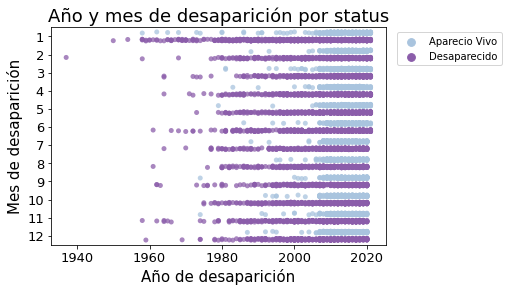

In [ ]:
# Gráfico de distribución de aparecidos y desaparecidos a lo largo de los
# años en los que hay reporte y para cada mes
sns.stripplot(x = "año", y = "mes", hue = "status",
              data = datos, dodge = True, alpha = .75,
              size = 5, palette = "BuPu")
plt.xlabel("Año de desaparición", size = 15)
plt.ylabel("Mes de desaparición", size = 15)
plt.title("Año y mes de desaparición por status", size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.legend(bbox_to_anchor = (1.02, 1))
#plt.savefig('año_mes.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

*Observamos que la frecuencia de datos de personas aparecidas y desaparecidas es constante a lo largo de los meses, con una ligera tendencia a reportarse en el mes de enero, quizás por razones burocráticas, a lo largo de los años. Además vemos que la frecuencia de datos tiende a concentrarse en los últimos años: más constantemente a partir de 1980. Por lo tanto, se podría prescindir de la variable "mes" y tal vez se podrían restringir los registros a los últimos 20 años, cuando el reporte y registro de personas desaparecidas ha sido más consistente, cuando las condiciones sociales son relativamente más homogéneas y cuando se puede tener una proporción más homogénea entre aparecidos y desaparecidos. Sin embargo, perderíamos la interpretación histórica de los datos. Por lo tanto, lo dejamos así.*

In [ ]:
# Sacamos la columna de mes
datos = datos.drop('mes', 1)

In [ ]:
# Calculamos la diferencia de años con respecto al año actual (2021)
datos.año = 2021 - datos.año

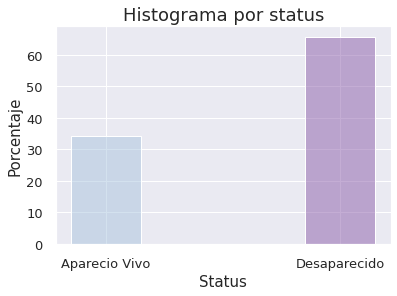

In [ ]:
# Verificamos la distribución
sns.set(style = "darkgrid")
sns.histplot(datos, x = "status", stat = "percent", hue = "status",
             palette = "BuPu", shrink = 0.3, legend = False)
plt.xlabel("Status", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.title("Histograma por status", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
#plt.savefig('hist_status.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

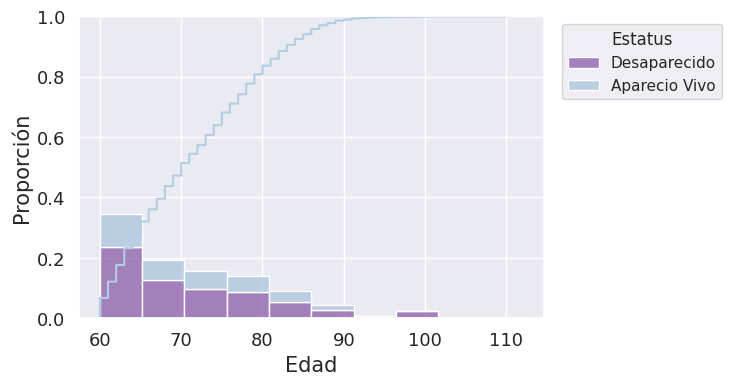

In [ ]:
# Histograma de edad por status
sns.set(style = "darkgrid")
fig, ax = plt.subplots()
sns.histplot(data = datos, x = 'edad', stat = 'proportion', hue = 'status',
                palette = "BuPu", multiple = "stack", bins = 10, kde = False)
plt.xlabel("Edad", size = 15)
plt.ylabel("Proporción", size = 15)
#plt.title("Histograma de edad por status", size = 18)
plt.legend(title = "Estatus", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.xticks(size = 13)
plt.yticks(size = 13)
sns.ecdfplot(data=datos[datos.status == "Aparecio Vivo"], x = "edad",
             complementary = False, color = "#b3cde3")
#plt.savefig('hist_edad.png', dpi = 300, figsize = (8, 11),
#            bbox_inches = 'tight')

*En este histograma observamos que la distribución de edad es muy similar entre aparecidos y desaparecidos con un sesgo marcado hacia la derecha, por lo cual se hará necesario transformar esta variable.*

(array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120.]),
 <a list of 8 Text major ticklabel objects>)

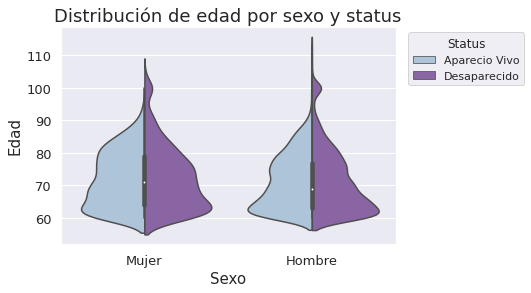

In [ ]:
# Gráfico de violines de la distribución por edad de los aparecidos divi-
# didos por sexo
sns.set(style = "darkgrid")
sns.violinplot(x = "sexo", y = "edad", hue = "status",
                    data = datos, palette = "BuPu", split = True,
               saturation = 0.8, inner = "box",
               order = ("Mujer", "Hombre"))
plt.xlabel("Sexo", size = 15)
plt.ylabel("Edad", size = 15)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1))
plt.title("Distribución de edad por sexo y status", size = 18)
plt.xticks(size = 13)
plt.yticks(size = 13)
#plt.savefig('edad_sexo_status.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

*En este gráfico de violines, observamos que la mayoría de registros se encuentran entre los 60 y los 70 años, que las edades máximas son mayores en hombres que en mujeres y en mujeres desaparecidas que aparecidas.*

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

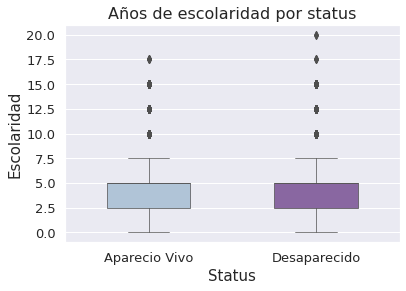

In [ ]:
# Gráfico de la distribución por escolaridad
sns.set(style = "darkgrid")
sns.boxplot(data = datos, x = "status", y = "escolaridad", palette = "BuPu",
            linewidth = 0.7, width = 0.5)
plt.xlabel("Status", size = 15)
plt.ylabel("Escolaridad", size = 15)
plt.title("Años de escolaridad por status", size = 16)
plt.yticks(size = 13)
plt.xticks(size = 13)
#plt.savefig('status_educación.png', dpi = 300, figsize = (8, 11),
#            bbox_inches = 'tight')

*Observamos que el promedio y la distribución de años de escolaridad es prácticamente el mismo entre el grupo de aparecidos y desaparecidos.*

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

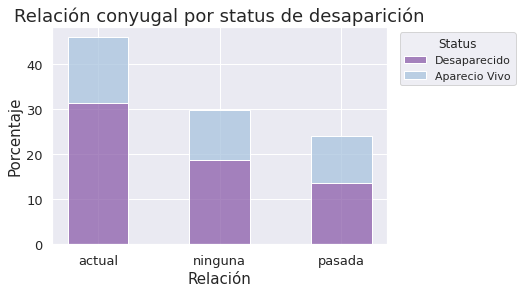

In [ ]:
# Status desaparición por estado civil
sns.set(style = "darkgrid")
sns.histplot(datos, x = "relacion", hue = "status", multiple = "stack",
                 stat = "percent", palette = "BuPu", shrink = 0.5)
plt.xlabel("Relación", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.title("Relación conyugal por status de desaparición", size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
#plt.savefig('sexo_estado_civil.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

*En este histograma observamos que tanto en el grupo de aparecidos como en el de desaparecidos, la mayoría de personas (40% del total de registros) se encuentran en una relación conyugal actual. En el grupo de desaparecidos, hay ligeramente un mayor porcentaje de personas con ninguna relación reportada que con una relación conyugal pasada, mientras que en el grupo de aparecidos, este porcentaje es exactamente el mismo.*

([0, 1], <a list of 2 Text major ticklabel objects>)

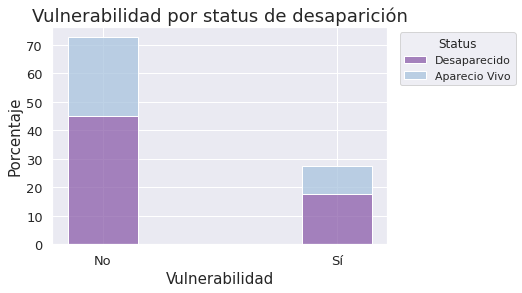

In [ ]:
# Status desaparición por vulnerabilidad
sns.set(style = "darkgrid")
sns.histplot(datos, x = "vulnerabilidad", hue = "status", multiple = "stack",
                 stat = "percent", palette = "BuPu", shrink = 0.3)
plt.xlabel("Vulnerabilidad", size = 15)
plt.ylabel("Porcentaje", size = 15)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.title("Vulnerabilidad por status de desaparición", size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
#plt.savefig('vulnerabilidad.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

*En este histograma observamos que la mayoría de registros (70% aprox.) no tiene un factor de vulnerabilidad reportado y esto aplica para ambos grupos.*

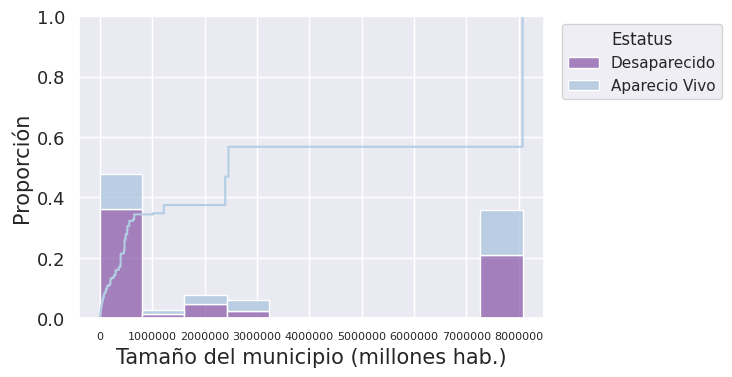

In [ ]:
# Tamaño del municipio
sns.set(style = "darkgrid")
fig, ax = plt.subplots()
sns.histplot(data = datos, x = 'municipio', stat = 'proportion', hue = 'status',
                palette = "BuPu", multiple = "stack", bins = 10, kde = False)
plt.xlabel("Tamaño del municipio (millones hab.)", size = 15)
plt.ylabel("Proporción", size = 15)
plt.legend(title = "Estatus",
           labels = datos.status.unique(),
           bbox_to_anchor = (1.4, 1))
#plt.title("Histograma de municipio y status de desaparición", size = 18)
plt.xticks(size = 8)
plt.yticks(size = 13)
sns.ecdfplot(data = datos[datos.status == "Aparecio Vivo"], x = "municipio",
             complementary = False, ax = ax, color = "#b3cde3")
#plt.savefig('hist_municipio.png', dpi = 300, figsize = (8, 11),
#            bbox_inches = 'tight')

*En este histograma observamos, primero, que el 50% de los datos de la presente base de datos son de Bogotá. Además, vemos que la distribución del tamaño del municipio es bimodal, estando o por debajo de 1 millón o en los 8 millones (Bogotá, D.C.). En ese caso, vemos que hay mayor frecuencia de desaparecidos que aparecidos en los dos casos extremos, mientras que en los casos intermedios (entre 1 millón y 3 millones de habitantes) hay ligeramente mayor proporción de aparecidos que desaparecidos. Esta variable habrá que transformarla para reducir esas diferencias tan extremas.*

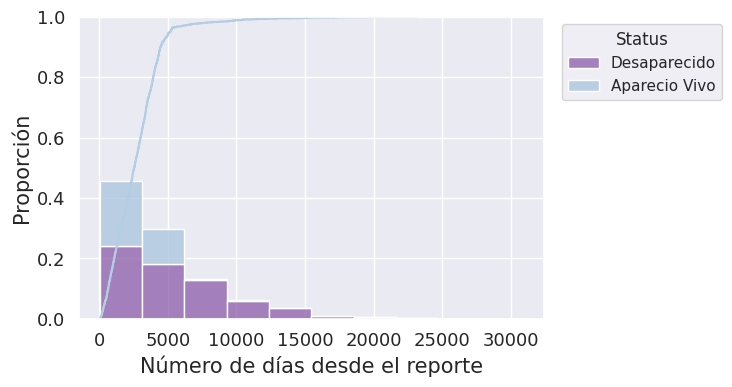

In [ ]:
# Finalmente, miramos la distribución por días
sns.set(style = "darkgrid")
fig, ax = plt.subplots()
sns.histplot(data = datos, x = 'dias', stat = 'proportion', hue = 'status',
                palette = "BuPu", multiple = "stack", bins = 10, kde = False)
plt.xlabel("Número de días desde el reporte", size = 15)
plt.ylabel("Proporción", size = 15)
#plt.title("Distribución de año de desaparición por status", size = 18)
plt.legend(title = "Status", bbox_to_anchor = (1.4, 1),
           labels = datos.status.unique())
plt.xticks(size = 13)
plt.yticks(size = 13)
sns.ecdfplot(data = datos[datos.status == "Aparecio Vivo"], x = "dias",
             complementary = False, ax = ax, color = "#b3cde3")
plt.savefig('hist_dias.png', dpi = 300, figsize = (8, 11),
            bbox_inches = 'tight')

*En el histograma anterior observamos que hay un sesgo hacia la derecha, es decir, menos datos por encima de 15 años. De la misma manera, vemos que casi todos los registros con status de aparecido se encuentran por debajo de los 15 años, indicando que las personas reportadas como desaparecidas hace más de 15 años o nunca aparecieron o nunca se pudo actualizar su status de aparición (viva o fallecida).*

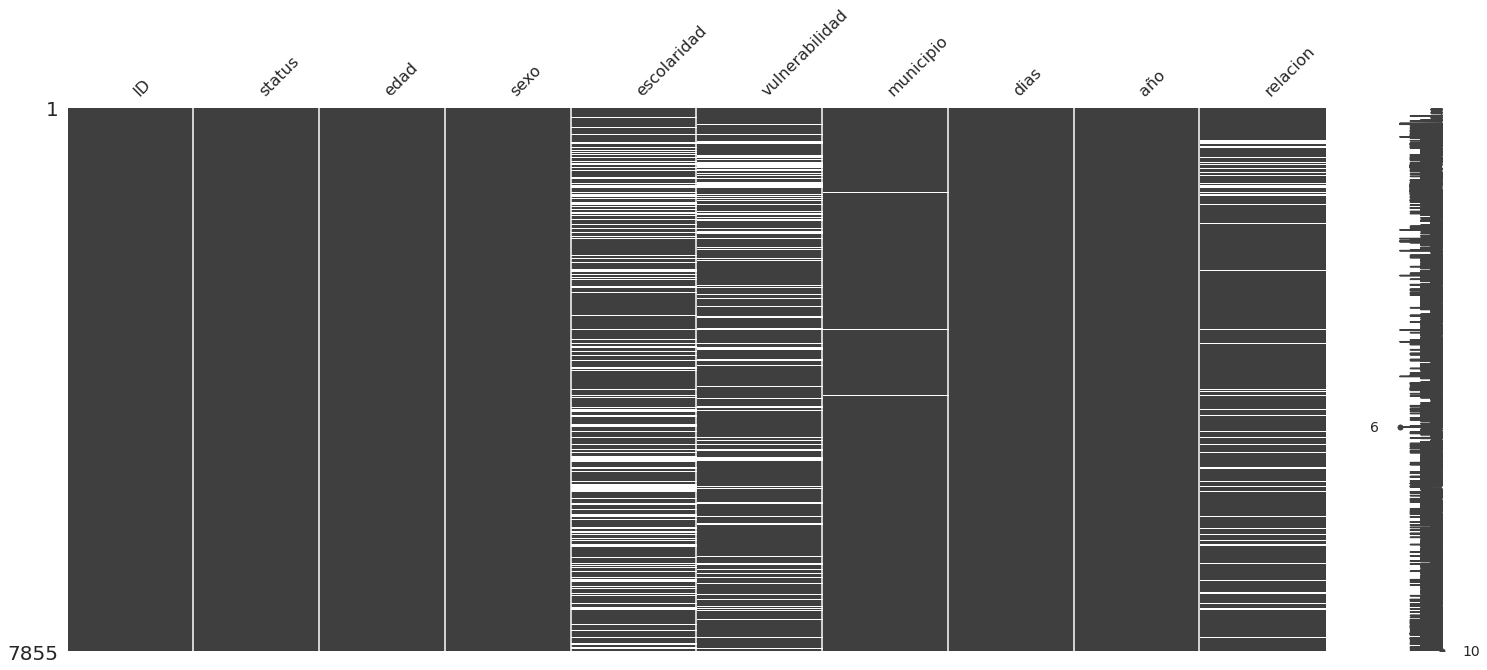

In [ ]:
# Visualizar el patrón de datos faltantes
msno.matrix(datos)

*En el gráfico anterior pudimos observar las variables con datos faltantes (marcados en blanco).*

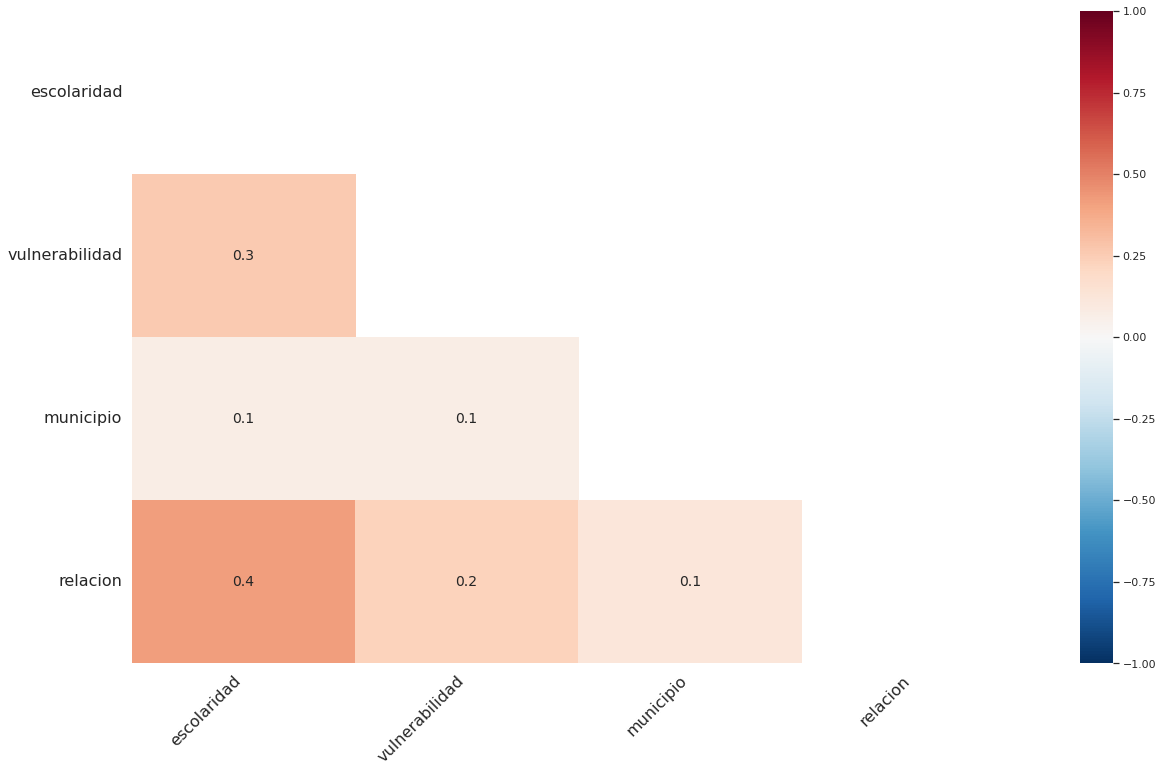

In [ ]:
# Visualizar relaciones entre variables con datos faltantes
msno.heatmap(datos, cmap = plt.get_cmap('RdBu').reversed())

*Observamos relativamente alta correlación entre datos faltantes entre 'escolaridad' y 'relación' (mayor escolaridad en personas con ninguna relación o relación pasada) y entre 'escolaridad' y 'vulnerabilidad' (mayor escolaridad en personas con mayor vulnerabilidad). Un poco menos fuerte y en dirección positiva la correlación entre 'relación' y 'vulnerabilidad' y entre 'relación' y 'municipio'.*

- **Multivariados (Sweetviz)**

In [ ]:
# Creamos una variable de salida numérica para Sweetviz
datos['aparecio'] = np.where(datos['status'] == 'Aparecio Vivo', 1, 0)

In [ ]:
# Instalamos Sweetviz
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 7.0 MB/s 


In [ ]:
# Importamos Sweetviz y creamos el reporte (anotando la variable "aparecio"
# como variable de salida)
import sweetviz as sv
reporte = sv.analyze(datos.loc[:, datos.columns != 'ID'], "aparecio")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# Desplegamos el reporte
reporte.show_html(filepath='report.html',
open_browser=True,
layout='vertical')
#display(HTML('SWEETVIZ_REPORT.html'))

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### c. Algunas pruebas de hipótesis (nivel *alpha* = 0.05)

- ¿Se diferencian en **edad** aparecidos y desaparecidos? ===> **No**

In [ ]:
# T-test para edad
stats.ttest_ind(datos.edad[datos.status == "Aparecio Vivo"], datos.edad[datos.status == "Desaparecido"])

Ttest_indResult(statistic=-0.4845283492782933, pvalue=0.6280244632996553)

In [ ]:
# Medias de edad
np.mean(datos.edad[datos.status == "Aparecio Vivo"]), np.mean(datos.edad[datos.status == "Desaparecido"])

(71.34696913350687, 71.45547812620984)

- ¿Se diferencian en **sexo** aparecidos y desaparecidos? ===> **Sí**. Hay más hombres desaparecidos que aparecidos.

In [ ]:
# Crear la tabla de contingencia para sexo
sexo_crosstab = pd.crosstab(datos['status'], datos['sexo'])
sexo_crosstab

sexo,Hombre,Mujer
status,,
Aparecio Vivo,1958,731
Desaparecido,4291,875


In [ ]:
# Prueba de chi cuadrado para sexo (tomado de:
# https://stackoverflow.com/questions/64669448/understanding-scipy-stats-chisquare)
chi2, p, dof, expected = stats.chi2_contingency(sexo_crosstab)
print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     113.54
p-value:            1.6447e-26
degrees of freedom: 1
expected frequencies:
[[2139.21845958  549.78154042]
 [4109.78154042 1056.21845958]]


In [ ]:
# Ver el porcentaje de valores por sexo
pd.crosstab(datos['status'], datos['sexo'], normalize = 'index') # % filas

sexo,Hombre,Mujer
status,,
Aparecio Vivo,0.728152,0.271848
Desaparecido,0.830623,0.169377


- ¿Se diferencian en **años** desde el reporte de desaparición aparecidos y desaparecidos? ===> **Sí**. Los aparecidos tienen menor número de años desde el reporte de desaparición (casi la mitad) que los desaparecidos.

In [ ]:
# T-test para año
stats.ttest_ind(datos.año[datos.status == "Aparecio Vivo"],
                datos.año[datos.status == "Desaparecido"])

Ttest_indResult(statistic=-31.190683289957338, pvalue=1.885133395386112e-201)

In [ ]:
# Medias de año
np.mean(datos.año[datos.status == "Aparecio Vivo"]),\
np.mean(datos.año[datos.status == "Desaparecido"])

(7.343250278914095, 14.686411149825783)

- ¿Se diferencian en el **tamaño del municipio** de la desaparición (en número de habitantes) aparecidos y desaparecidos? ===> **Sí**. Los desaparecidos tienden a ser de municipios más pequeños que los aparecidos.

In [ ]:
# T-test del tamaño del municipio
stats.ttest_ind(datos.dropna().municipio[datos.status == "Aparecio Vivo"],
                datos.dropna().municipio[datos.status == "Desaparecido"])

Ttest_indResult(statistic=8.009838770769429, pvalue=1.421694541115618e-15)

In [ ]:
# Medias de tamaño de municipio
np.mean(datos.municipio[datos.status == "Aparecio Vivo"]),\
np.mean(datos.municipio[datos.status == "Desaparecido"])

(4104185.3435057686, 2958551.858839564)

- ¿Se diferencian en **educación** aparecidos y desaparecidos? ===> **Sí**. Los desaparecidos tienden a tener ligeramente menos años de educación que los aparecidos.

In [ ]:
# T-test años de escolaridad
stats.ttest_ind(datos.dropna().escolaridad[datos.status == "Aparecio Vivo"],
                datos.dropna().escolaridad[datos.status == "Desaparecido"])

Ttest_indResult(statistic=2.0041648753143297, pvalue=0.045106993537317217)

In [ ]:
# Medias de años de escolaridad
np.mean(datos.escolaridad[datos.status == "Aparecio Vivo"]),\
np.mean(datos.escolaridad[datos.status == "Desaparecido"])

(5.1163594470046085, 4.851718403547672)

- ¿Se diferencian en **vulnerabilidad** aparecidos y desaparecidos? ===> **Sí**. Hay más desaparecidos que aparecidos con factor de vulnerabilidad.

In [ ]:
# Crear la tabla de contingencia de vulnerabilidad
vulnerab_crosstab = pd.crosstab(datos['status'], datos['vulnerabilidad'])
vulnerab_crosstab

vulnerabilidad,No,Sí
status,,
Aparecio Vivo,1759,608
Desaparecido,2879,1135


In [ ]:
# Prueba de chi cuadrado de vulnerabilidad
chi2, p, dof, expected = stats.chi2_contingency(vulnerab_crosstab)
print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     4.8993
p-value:            0.026868
degrees of freedom: 1
expected frequencies:
[[1720.44287729  646.55712271]
 [2917.55712271 1096.44287729]]


In [ ]:
# Ver el porcentaje actual de valores de vulnerabilidad
pd.crosstab(datos['status'], datos['vulnerabilidad'], normalize='index')

vulnerabilidad,No,Sí
status,,
Aparecio Vivo,0.743135,0.256865
Desaparecido,0.717240,0.282760


- ¿Se diferencian en el tipo de **relación conyugal** aparecidos y desaparecidos? ===> **Sí**. Hay más aparecidos con relación pasada y menos con actual, mientras que los todavía desaparecidos tienden a tener más relación actual que pasada.

In [ ]:
# Crear la tabla de contingencia de relación conyugal
relacion_crosstab = pd.crosstab(datos['status'], datos['relacion'])
relacion_crosstab

relacion,actual,ninguna,pasada
status,,,
Aparecio Vivo,1024,790,733
Desaparecido,2215,1316,964


In [ ]:
# Prueba de chi cuadrado para relación conyugal
chi2, p, dof, expected = stats.chi2_contingency(relacion_crosstab)
print(f"chi2 statistic       : {chi2:.5g}")
print(f"p-value              : {p:.5g}")
print(f"degrees of freedom   : {dof}")
print(f"expected frequencies :")
print(expected)

chi2 statistic       : 67.018
p-value              : 2.7999e-15
degrees of freedom   : 2
expected frequencies :
[[1171.50426015  761.71286566  613.78287418]
 [2067.49573985 1344.28713434 1083.21712582]]


In [ ]:
# Ver el porcentaje actual de valores de relación conyugal
pd.crosstab(datos['status'], datos['relacion'], normalize = 'index')

relacion,actual,ninguna,pasada
status,,,
Aparecio Vivo,0.402042,0.310169,0.287790
Desaparecido,0.492770,0.292770,0.214461


#### ==> d. **Conclusión** del análisis descriptivo <==

Como pudimos observar en los puntos anteriores del análisis descriptivo, las variables que más podrían aportar a una mayor probabilidad de aparición son:
- Año más reciente
- Municipio con mayor número de habitantes

Y, en menor medida:
- Relación conyugal pasada o sin relación conocida
- No tener factor de vulnerabilidad
- Sexo femenino

### **7 Generar set de entrenamiento y set de testeo**
---

Ahora generamos un set de entrenamiento y un set de testeo de manera aleatoria para garantizar independencia antes de realizar la transformación de las variables. Esto nos permitirá garantizar que no haya fuga de etiqueta.

In [ ]:
# Generar un set de entrenamiento y un set de testeo estratificando por la
# variable de salida y
X = datos.drop("aparecio", axis = 1)
y = datos["aparecio"].copy()
X = X.drop(["ID", "status", "año"], axis = 1)   # Ya que el ID se relaciona con el año
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, 
                                                    test_size = 0.2,
                                                    random_state = 2021)

In [ ]:
# Verificamos que el porcentaje de registros sin información, así como de
# las clases sea equitativo entre ambos sets

# Entrenamiento
clase_train = (y_train == 0)

# Prueba
clase_test = (y_test == 0)

# Resultado
print("El porcentaje de registros con status 'Desaparecido' en",
      "los datos de entrenamiento es de:",
      np.round(((len(y_train[clase_train == True]) / len(y_train)) * 100), 2))
print("El porcentaje de registros con status 'Desaparecido' en",
      "los datos de testeo es de:",
      np.round(((len(y_test[clase_test == True]) / len(y_test)) * 100), 2))

El porcentaje de registros con status 'Desaparecido' en los datos de entrenamiento es de: 65.77
El porcentaje de registros con status 'Desaparecido' en los datos de testeo es de: 65.75


### **8 Imputación de datos perdidos en los datos de entrenamiento**
---

#### **a. Escolaridad**

In [ ]:
# Imputamos por la media, ya que representa el nivel de educación del país
# de la época en la que los adultos mayores de esta generación estudiaron 
imp_edu = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_edu.fit(X_train[['escolaridad']])
SimpleImputer()
X_train['escolaridad'] = imp_edu.transform(X_train[['escolaridad']]).flatten()
X_train.isnull().sum()

edad                 0
sexo                 0
escolaridad          0
vulnerabilidad    1164
municipio           22
dias                 0
relacion           645
dtype: int64

In [ ]:
# Reemplazamos los valores faltantes en el conjunto de prueba utilizando la
# media del conjunto de *entrenamiento*
X_test['escolaridad'] = X_test['escolaridad'].replace(np.nan, X_train['escolaridad'].mean())
X_test.isnull().sum()

edad                0
sexo                0
escolaridad         0
vulnerabilidad    310
municipio          10
dias                0
relacion          168
dtype: int64

#### **b. Municipio**

In [ ]:
# Imputamos por la media 
imp_mun = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mun.fit(X_train[['municipio']])
SimpleImputer()
X_train.loc[X_train['municipio'].isna(), 'municipio'] =\
imp_mun.transform(np.array(X_train.municipio[X_train['municipio'].isna()]).reshape(-1, 1))
X_train.isnull().sum()

edad                 0
sexo                 0
escolaridad          0
vulnerabilidad    1164
municipio            0
dias                 0
relacion           645
dtype: int64

In [ ]:
# Reemplazamos los valores faltantes en el conjunto de prueba utilizando la
# media del conjunto de *entrenamiento*
X_test['municipio'] = X_test['municipio'].fillna(X_train.loc[:, 'municipio'].mean())
X_test.isnull().sum()

edad                0
sexo                0
escolaridad         0
vulnerabilidad    310
municipio           0
dias                0
relacion          168
dtype: int64

#### **c. Vulnerabilidad**

In [ ]:
# Imputamos por una constante, ya que "desconocido" es una categoría
# con sentido en esta variable porque hay adultos mayores para los cuales
# no se conoce factor de vulnerabilidad sencillamente porque no se ha
# evaluado
imp_vul = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent') #'constant',
                        #fill_value = "desconocido") # Se probó así inicialmente
imp_vul.fit(X_train[['vulnerabilidad']])
SimpleImputer()
X_train['vulnerabilidad'] = imp_vul.transform(X_train[['vulnerabilidad']])
X_train['vulnerabilidad'] = X_train['vulnerabilidad'].astype("category")
X_train.isnull().sum()

edad                0
sexo                0
escolaridad         0
vulnerabilidad      0
municipio           0
dias                0
relacion          645
dtype: int64

In [ ]:
# Reemplazamos los valores faltantes en el conjunto de prueba utilizando la
# media del conjunto de *entrenamiento*
X_test['vulnerabilidad'] = X_test['vulnerabilidad'].fillna(X_train.loc[:, 'vulnerabilidad'].mode()[0]) #X_test.vulnerabilidad.cat.add_categories("desconocido").fillna("desconocido")
X_test.isnull().sum()

edad                0
sexo                0
escolaridad         0
vulnerabilidad      0
municipio           0
dias                0
relacion          168
dtype: int64

#### **d. Relación conyugal**

In [ ]:
# Imputamos por la moda asumiendo que la mayoría tiene ese tipo de status de
# relación (por ejemplo, por más homogeneidad en las costumbres de esa
# generación)
imp_rel = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp_rel.fit(X_train[['relacion']])
SimpleImputer()
X_train['relacion'] = imp_rel.transform(X_train[['relacion']])
X_train['relacion'] = X_train['relacion'].astype("category")
X_train.isnull().sum()

edad              0
sexo              0
escolaridad       0
vulnerabilidad    0
municipio         0
dias              0
relacion          0
dtype: int64

In [ ]:
# Reemplazamos los valores faltantes en el conjunto de prueba utilizando la
# media del conjunto de *entrenamiento*
X_test['relacion'] = X_test.relacion.fillna(X_train.relacion.mode().iloc[0])
X_test.isnull().sum()

edad              0
sexo              0
escolaridad       0
vulnerabilidad    0
municipio         0
dias              0
relacion          0
dtype: int64

### **9 Modelo base**
---

Siguiendo el análisis descriptivo, proponemos un modelo base en el que si la desaparición ocurre en un municipio con igual o mayor número de habitantes que la media de los datos o tiene una duración (en días) igual o inferior a la media de la duración de desaparición de los datos, entonces se pronostica que la persona va a aparecer. Para hacerlo verdaderamente simple, dejaremos 1 sola variable: días transcurridos desde la desaparición.

#### **a. Creación del modelo base**
Media de días de desaparición

In [ ]:
# Modelo base (datos de entrenamiento)
base = pd.concat([X_train, y_train], axis = 1)
base['aparecio_pred'] = (base.dias <= np.mean(base.dias)).astype(int)
base

,edad,sexo,escolaridad,vulnerabilidad,municipio,dias,relacion,aparecio,aparecio_pred
9852,77,Hombre,4.966056,No,463218.0,8011,actual,0,0
61048,74,Mujer,0.000000,No,8076734.0,3634,pasada,0,1
63103,80,Mujer,5.000000,No,522442.0,4564,ninguna,1,0
122817,84,Hombre,4.966056,No,2457680.0,1593,pasada,1,1
104533,74,Hombre,2.500000,No,8076734.0,2271,pasada,1,1
...,...,...,...,...,...,...,...,...,...
119036,78,Hombre,5.000000,No,8076734.0,1732,actual,0,1
110709,76,Hombre,0.000000,Sí,200829.0,2371,actual,0,1
52947,77,Mujer,5.000000,No,8076734.0,3852,pasada,1,1
1091,77,Hombre,5.000000,No,8076734.0,5240,pasada,0,0


In [ ]:
# Modelo base (datos de prueba)
base_test = pd.concat([X_test, y_test], axis = 1)
base_test['aparecio_pred'] = (base_test.dias <= np.mean(base.dias)).astype(int)
base_test

,edad,sexo,escolaridad,vulnerabilidad,municipio,dias,relacion,aparecio,aparecio_pred
149087,63,Mujer,4.966056,Sí,36708.0,7872,ninguna,0,0
10621,100,Hombre,4.966056,No,491387.0,6451,ninguna,0,0
84654,71,Hombre,5.000000,No,18678.0,7724,actual,0,0
123355,72,Hombre,4.966056,No,2394870.0,1576,ninguna,0,1
82512,60,Hombre,15.000000,No,2457680.0,6672,actual,0,0
...,...,...,...,...,...,...,...,...,...
84409,63,Mujer,4.966056,No,495200.0,2941,ninguna,1,1
101399,77,Hombre,10.000000,Sí,8076734.0,2339,actual,0,1
85655,86,Mujer,0.000000,No,8076734.0,2882,pasada,1,1
24131,62,Hombre,4.966056,No,562704.0,9467,actual,1,0


#### **b. Resultado del modelo base**

In [ ]:
# Desplegamos sólo las columnas que nos muestran los valores reales
# de la variable objetivo ("aparecio") y los valores pronosticados por
# nuestro modelo base ("aparecio_pred")
filtro_columnas = ['aparecio', 'aparecio_pred']
base_test[filtro_columnas]

,aparecio,aparecio_pred
149087,0,0
10621,0,0
84654,0,0
123355,0,1
82512,0,0
...,...,...
84409,1,1
101399,0,1
85655,1,1
24131,1,0


#### **c. Evaluación del modelo base**

In [ ]:
# Evaluación del modelo en los datos de prueba
print("Métricas de evaluación del modelo base:", "\n"
      "accuracy  =", np.around(accuracy_score(base_test.aparecio, base_test.aparecio_pred),
                               2), "\n"
      "precision =", np.around(precision_score(base_test.aparecio, base_test.aparecio_pred),
                               2), "\n"
      "recall    =", np. around(recall_score(base_test.aparecio, base_test.aparecio_pred),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(base_test.aparecio, base_test.aparecio_pred),
                               2), "\n"
      "F1 score  =", np.around(f1_score(base_test.aparecio, base_test.aparecio_pred), 2))

Métricas de evaluación del modelo base: 
accuracy  = 0.63 
precision = 0.48 
recall    = 0.89 
ROC AUC   = 0.69 
F1 score  = 0.62


#### **d. Matriz de confusión del modelo base**

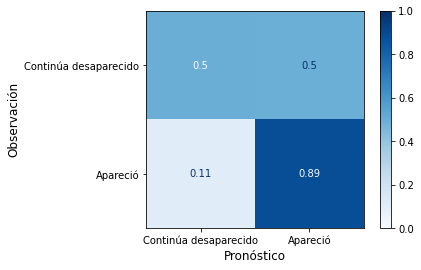

In [ ]:
# Realizar una gráfica de la matriz de confusión del modelo base
sns.reset_orig()
cm = confusion_matrix(base_test.aparecio, base_test.aparecio_pred, normalize = "true")
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = ["Continúa desaparecido",
                                                "Apareció"])
disp.plot(cmap = plt.cm.Blues)
disp.ax_.get_images()[0].set_clim(0, 1)
plt.xlabel("Pronóstico", size = 12)
plt.ylabel("Observación", size = 12)
#plt.title("Modelo Base")
plt.savefig('confusion_matrix_modelo_base.png', dpi = 300, figsize = (8, 11),
            bbox_inches = 'tight')

*Observamos que el modelo base es un modelo bastante sensible (89%) pero bastante impreciso (48%). Por lo tanto, necesitamos un modelo de aprendizaje automático que involucre otras variables.*

### **10 Ajuste de variables**
---

#### **a. Datos de entrenamiento**

In [ ]:
# One Hot Encoder: Datos categóricos
X_train['sexo'] = X_train['sexo'].astype("category")
categorical_features = ["sexo", "relacion", "vulnerabilidad"]
enc = OneHotEncoder()
enc.fit(X_train[categorical_features])
encoded_columns = enc.transform(X_train[categorical_features]).toarray()
data_hot_encoded = pd.DataFrame(encoded_columns, index = X_train.index,
                                columns = enc.get_feature_names())
data_hot_encoded

,x0_Hombre,x0_Mujer,x1_actual,x1_ninguna,x1_pasada,x2_No,x2_Sí
9852,1.0,0.0,1.0,0.0,0.0,1.0,0.0
61048,0.0,1.0,0.0,0.0,1.0,1.0,0.0
63103,0.0,1.0,0.0,1.0,0.0,1.0,0.0
122817,1.0,0.0,0.0,0.0,1.0,1.0,0.0
104533,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
119036,1.0,0.0,1.0,0.0,0.0,1.0,0.0
110709,1.0,0.0,1.0,0.0,0.0,0.0,1.0
52947,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1091,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Standard Scaler: Datos numéricos
numeric_features = ["edad", "escolaridad", "municipio", "dias"]
scaler = StandardScaler()
scaler.fit(X_train[numeric_features])
scaler_columns = scaler.transform(X_train[numeric_features])
data_scaled = pd.DataFrame(scaler_columns, index = X_train.index,
                           columns = numeric_features)
data_scaled

,edad,escolaridad,municipio,dias
9852,0.593890,0.000000,-0.803367,0.916313
61048,0.275541,-1.672331,1.308581,-0.217883
63103,0.912239,0.011431,-0.786939,0.023105
122817,1.336704,0.000000,-0.250114,-0.746759
104533,0.275541,-0.830450,1.308581,-0.571072
...,...,...,...,...
119036,0.700006,0.011431,1.308581,-0.710741
110709,0.487774,-1.672331,-0.876152,-0.545159
52947,0.593890,0.011431,1.308581,-0.161393
1091,0.593890,0.011431,1.308581,0.198274


In [ ]:
# Combinar ambas transformaciones
X_train_proc = pd.concat([data_hot_encoded, data_scaled], axis = 1)
X_train_proc.describe()

,x0_Hombre,x0_Mujer,x1_actual,x1_ninguna,x1_pasada,x2_No,x2_Sí,edad,escolaridad,municipio,dias
count,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6.284000e+03,6.284000e+03,6.284000e+03,6.284000e+03
mean,0.800286,0.199714,0.515118,0.270369,0.214513,0.777212,0.222788,6.862924e-16,-2.282139e-17,3.922176e-17,-8.612885e-17
std,0.399817,0.399817,0.499811,0.444186,0.410517,0.416150,0.416150,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.210087e+00,-1.672331e+00,-9.315152e-01,-1.149182e+00
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-8.917384e-01,0.000000e+00,-8.999617e-01,-7.164415e-01
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-1.489242e-01,1.143071e-02,-5.923393e-01,-2.799433e-01
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.938900e-01,1.143071e-02,1.308581e+00,4.174302e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.307961e+00,5.062716e+00,1.308581e+00,6.837089e+00


In [ ]:
# Transformación de los Labels con Label Encoder
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_train_enc # 0 = Desaparecido; 1 = Apareció vivo

array([0, 0, 1, ..., 1, 0, 1])

#### **b. Datos de testeo**

In [ ]:
# One Hot Encoder: Datos categóricos
X_test['sexo'] = X_test['sexo'].astype("category")
encoded_columns_test = enc.transform(X_test[categorical_features]).toarray()
data_hot_encoded_test = pd.DataFrame(encoded_columns_test, index = X_test.index,
                                columns = enc.get_feature_names())
data_hot_encoded_test

,x0_Hombre,x0_Mujer,x1_actual,x1_ninguna,x1_pasada,x2_No,x2_Sí
149087,0.0,1.0,0.0,1.0,0.0,0.0,1.0
10621,1.0,0.0,0.0,1.0,0.0,1.0,0.0
84654,1.0,0.0,1.0,0.0,0.0,1.0,0.0
123355,1.0,0.0,0.0,1.0,0.0,1.0,0.0
82512,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
84409,0.0,1.0,0.0,1.0,0.0,1.0,0.0
101399,1.0,0.0,1.0,0.0,0.0,0.0,1.0
85655,0.0,1.0,0.0,0.0,1.0,1.0,0.0
24131,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Standard Scaler: Datos numéricos
scaler_columns_test = scaler.transform(X_test[numeric_features])
data_scaled_test = pd.DataFrame(scaler_columns_test, index = X_test.index,
                           columns = numeric_features)
data_scaled_test

,edad,escolaridad,municipio,dias
149087,-0.891738,-5.652918e-14,-0.921678,0.880295
10621,3.034565,-5.652918e-14,-0.795553,0.512076
84654,-0.042808,1.143071e-02,-0.926680,0.841944
123355,0.063308,-5.652918e-14,-0.267537,-0.751164
82512,-1.210087,3.378955e+00,-0.250114,0.569343
...,...,...,...,...
84409,-0.891738,-5.652918e-14,-0.794495,-0.397457
101399,0.593890,1.695193e+00,1.308581,-0.553451
85655,1.548937,-1.672331e+00,1.308581,-0.412746
24131,-0.997855,-5.652918e-14,-0.775770,1.293601


In [ ]:
# Combinamos ambas transformaciones
X_test_proc = pd.concat([data_hot_encoded_test, data_scaled_test], axis = 1)
X_test_proc.describe()

,x0_Hombre,x0_Mujer,x1_actual,x1_ninguna,x1_pasada,x2_No,x2_Sí,edad,escolaridad,municipio,dias
count,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1.571000e+03,1571.000000,1571.000000
mean,0.776575,0.223425,0.518778,0.259071,0.222151,0.781668,0.218332,0.007920,-1.851426e-02,-0.010065,0.009910
std,0.416673,0.416673,0.499806,0.438264,0.415825,0.413246,0.413246,0.996597,9.760040e-01,0.987535,0.982206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.210087,-1.672331e+00,-0.931342,-1.148923
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.785622,-5.652918e-14,-0.898011,-0.685476
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.148924,1.143071e-02,-0.267537,-0.264784
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.593890,1.143071e-02,1.308581,0.406093
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.095728,3.378955e+00,1.308581,4.763043


In [ ]:
# Aplicamos el label encoding ajustado en los labels de entrenamiento a los
# labels de testeo
y_test_enc = le.transform(y_test)
y_test_enc, le.inverse_transform(y_test_enc)

(array([0, 0, 0, ..., 1, 1, 0]), array([0, 0, 0, ..., 1, 1, 0]))

#### **c. Sub-muestreo: balanceo de clases**

In [ ]:
# Hacemos submuestreo de los datos de entrenamiento para ver el efecto del
# desbalance relativo de clases (aunque éste no es muy severo)
under_sampler = RandomUnderSampler(random_state = 2021)
X_res, y_res = under_sampler.fit_resample(X_train_proc, y_train_enc)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test_enc)}")

Training target statistics: Counter({0: 2151, 1: 2151})
Testing target statistics: Counter({0: 1033, 1: 538})


In [ ]:
# Calcular los pesos por clase para balancear
# Esto no se utiliza después, pero era para hacerse una idea
compute_class_weight('balanced', np.unique(y_test_enc), y_test_enc)

array([0.76040658, 1.46003717])

### **11 Modelos**
---

**Objetivo:** De acuerdo con el *modelo base (punto 9)*, los modelos de Machine Learning deberían, idealmente, poder superar alguno de los siguientes puntajes:
- Accuracy = 0.63
- Precision = 0.48
- Recall = 0.89
- ROC = 0.69
- F1 score = 0.62

#### **a. PyCaret: Análisis general para obtener los mejores modelos**

In [ ]:
# Especificar el setup: se corrige el desbalance
datos.aparecio = datos.aparecio.astype("category")
clf1 = setup(data = datos, ignore_features = ["ID", "status", "año"],
             target = 'aparecio', train_size = 0.8,
             normalize = True, data_split_stratify = True,
             categorical_imputation = 'mode',
             ordinal_features = { 'vulnerabilidad': ['No', 'Sí'] },
             fix_imbalance = True, session_id = 2021)

,Description,Value
0,session_id,2021
1,Target,aparecio
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(7855, 11)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,3
8,Ordinal Features,True
9,High Cardinality Features,False


In [ ]:
# Sacar el top 3 de modelos
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7086,0.7818,0.6695,0.5630,0.6114,0.3812,0.3851,0.225
rf,Random Forest Classifier,0.6999,0.7645,0.6128,0.5560,0.5828,0.3493,0.3505,1.164
gbc,Gradient Boosting Classifier,0.6914,0.7863,0.7834,0.5339,0.6348,0.3840,0.4055,0.686
et,Extra Trees Classifier,0.6824,0.7335,0.5658,0.5346,0.5494,0.3046,0.3051,0.993
ada,Ada Boost Classifier,0.6773,0.7692,0.8206,0.5181,0.6351,0.3713,0.4032,0.331
dummy,Dummy Classifier,0.6577,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.057
dt,Decision Tree Classifier,0.6558,0.6305,0.5504,0.4979,0.5225,0.2546,0.2556,0.083
knn,K Neighbors Classifier,0.6431,0.6983,0.6564,0.4842,0.5572,0.2695,0.2784,0.179
ridge,Ridge Classifier,0.6364,0.0000,0.8001,0.4813,0.6010,0.3031,0.3367,0.062
lda,Linear Discriminant Analysis,0.6364,0.7075,0.8001,0.4813,0.6010,0.3031,0.3367,0.071


*Con los resultados de PyCaret, vemos que los mejores modelos de clasificación fueron el "Light Gradient Boosting Machine", el "Random Forest Classifier" y el "Gradient Boosting Classifier".*

In [ ]:
# Revisar los parámetros del top 3 de modelos de clasificación de PyCaret
top3

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                     

*Aquí vemos los parámetros de los tres mejores modelos de clasificación.*

In [ ]:
# Mejor modelo de clasificación: aquí obtenemos el desempeño por Fold
lightgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7107,0.7856,0.6512,0.5668,0.6061,0.3791,0.3814
1,0.7266,0.7956,0.7116,0.5817,0.6402,0.4232,0.4288
2,0.7424,0.8123,0.6884,0.6091,0.6463,0.4450,0.4470
3,0.7011,0.7660,0.6296,0.5574,0.5913,0.3571,0.3587
4,0.7038,0.7777,0.6698,0.5560,0.6076,0.3730,0.3772
5,0.6990,0.7872,0.6419,0.5520,0.5935,0.3568,0.3593
6,0.6879,0.7773,0.6558,0.5361,0.5900,0.3421,0.3466
7,0.7245,0.7883,0.7256,0.5778,0.6433,0.4236,0.4309
8,0.6736,0.7423,0.6605,0.5182,0.5808,0.3198,0.3261
9,0.7166,0.7853,0.6605,0.5749,0.6147,0.3922,0.3946


In [ ]:
# Reajustar modelo
lightgbm_model_tuned = tune_model(lightgbm_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7043,0.7849,0.6605,0.5569,0.6043,0.3709,0.3744
1,0.7266,0.7970,0.6977,0.5837,0.6356,0.4195,0.4238
2,0.7409,0.8181,0.6605,0.6121,0.6353,0.4348,0.4356
3,0.6852,0.7632,0.6019,0.5372,0.5677,0.3214,0.3227
4,0.7070,0.7797,0.6419,0.5633,0.6000,0.3704,0.3724
5,0.7134,0.7849,0.6279,0.5745,0.6000,0.3774,0.3783
6,0.6990,0.7862,0.6512,0.5512,0.5970,0.3595,0.3627
7,0.7229,0.7911,0.6837,0.5810,0.6282,0.4097,0.4132
8,0.6831,0.7434,0.6651,0.5296,0.5897,0.3369,0.3428
9,0.7150,0.7847,0.6698,0.5714,0.6167,0.3921,0.3952


*La mejoría no parece significativa (el Recall y el F1-score aumentaron ligeramente pero la precisión disminuyó también ligeramente), por lo cual se continúa con el modelo sin tuning*

In [ ]:
# Revisar la estructura y valores de los datos de entrenamiento para verificar
# las codificaciones de las variables
get_config('X_train')

,edad,escolaridad,vulnerabilidad,municipio,dias,sexo_Mujer,relacion_actual,relacion_ninguna,relacion_pasada
9852,0.593890,-4.088505e-08,0.0,-0.803367,0.916313,0.0,1.0,0.0,0.0
61048,0.275541,-1.672331e+00,0.0,1.308581,-0.217883,1.0,0.0,0.0,1.0
63103,0.912239,1.143073e-02,0.0,-0.786938,0.023105,1.0,0.0,1.0,0.0
122817,1.336704,-4.088505e-08,0.0,-0.250114,-0.746759,0.0,0.0,0.0,1.0
104533,0.275541,-8.304502e-01,0.0,1.308581,-0.571072,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
119036,0.700006,1.143073e-02,0.0,1.308581,-0.710741,0.0,1.0,0.0,0.0
110709,0.487774,-1.672331e+00,1.0,-0.876152,-0.545159,0.0,1.0,0.0,0.0
52947,0.593890,1.143073e-02,0.0,1.308581,-0.161393,1.0,0.0,0.0,1.0
1091,0.593890,1.143073e-02,0.0,1.308581,0.198274,0.0,0.0,0.0,1.0


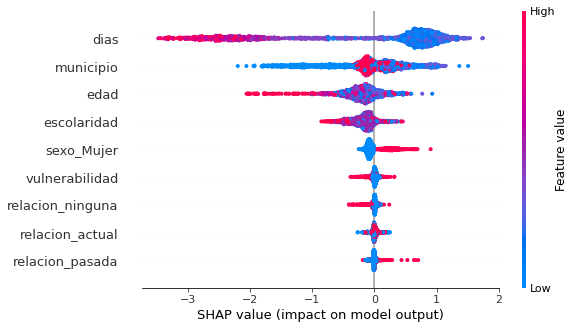

In [ ]:
# Revisar el comportamiento de las features en el modelo con respecto a la
# variable objetivo utilizando la gráfica de SHAP values
interpret_model(lightgbm_model) # Ver sin guardar
# explainer = shap.Explainer(lightgbm_model, get_config('X_test')) # Guardar
# shap_values = explainer(get_config('X_test'))
# fig = shap.plots.beeswarm(shap_values, show = False)
# f = plt.gcf() 
# f.savefig('shap_lightgbm_pycaret.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# Ver valores de las etiquetas de salida para confirmar la dirección de los
# efectos
get_config('prep_pipe').named_steps["dtypes"].replacement # 0 = Desaparecido, 1 = Apareció Vivo

{'0': 0, '1': 1}

*De la gráfica de valores de SHAP (SHapley Additive exPlanations) obtenemos que a un mayor número de días desde que se realizó el reporte de desaparición (al 30 de julio de 2021), una mayor edad de la persona al momento de desaparición y una ocurrencia de la desaparición en un municipio pequeño (o con menor número de habitantes), una menor probabilidad de aparición de una persona mayor. Las demás variables de la persona (escolaridad, sexo, relación o vulnerabilidad) no parecen contribuir de manera significativa a la probabilidad de aparición.*

In [ ]:
# Evaluación general del modelo
evaluate_model(lightgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

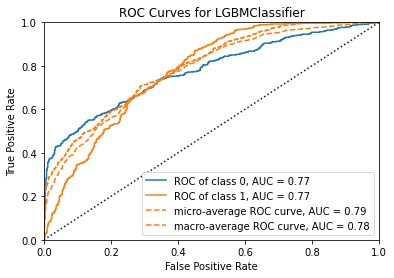

In [ ]:
# Graficar curva ROC (0 = Desaparecido; 1 = Apareció)
sns.reset_orig()
plot_model(lightgbm_model, plot = 'auc')

*Observamos valores adecuados del área bajo la curva de la curva Receiver Operating Characteristic para ambas clases (azul: apareció; verde: continúa desaparecido).*

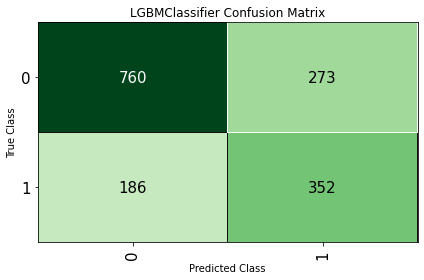

In [ ]:
# Graficar matriz de confusión
plot_model(lightgbm_model, plot = 'confusion_matrix')

*Observamos un mayor peso relativo de predicción correcta de las personas que continúan desaparecidas vs aquellas que aparecieron*

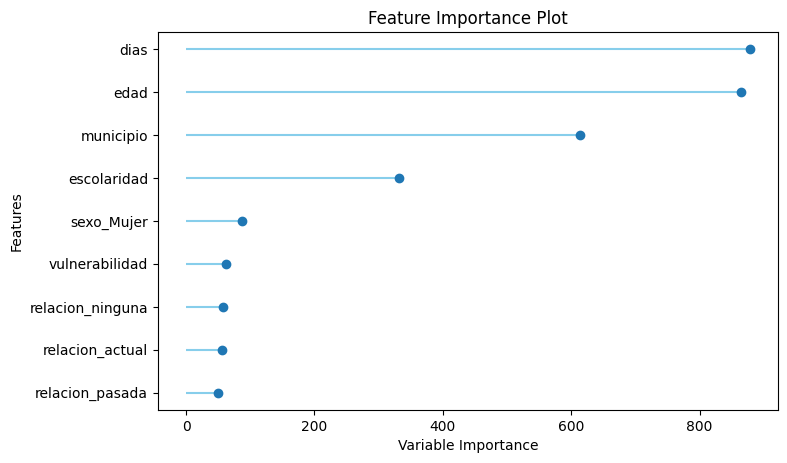

In [ ]:
# Mostrar gráfico de importancia de las features
plot_model(lightgbm_model, plot = 'feature')

*En el gráfico de importancia de features vemos que las más importantes en el mejor modelo fueron días, edad (muy cerca la una de la otra), municipio y, después, escolaridad.*

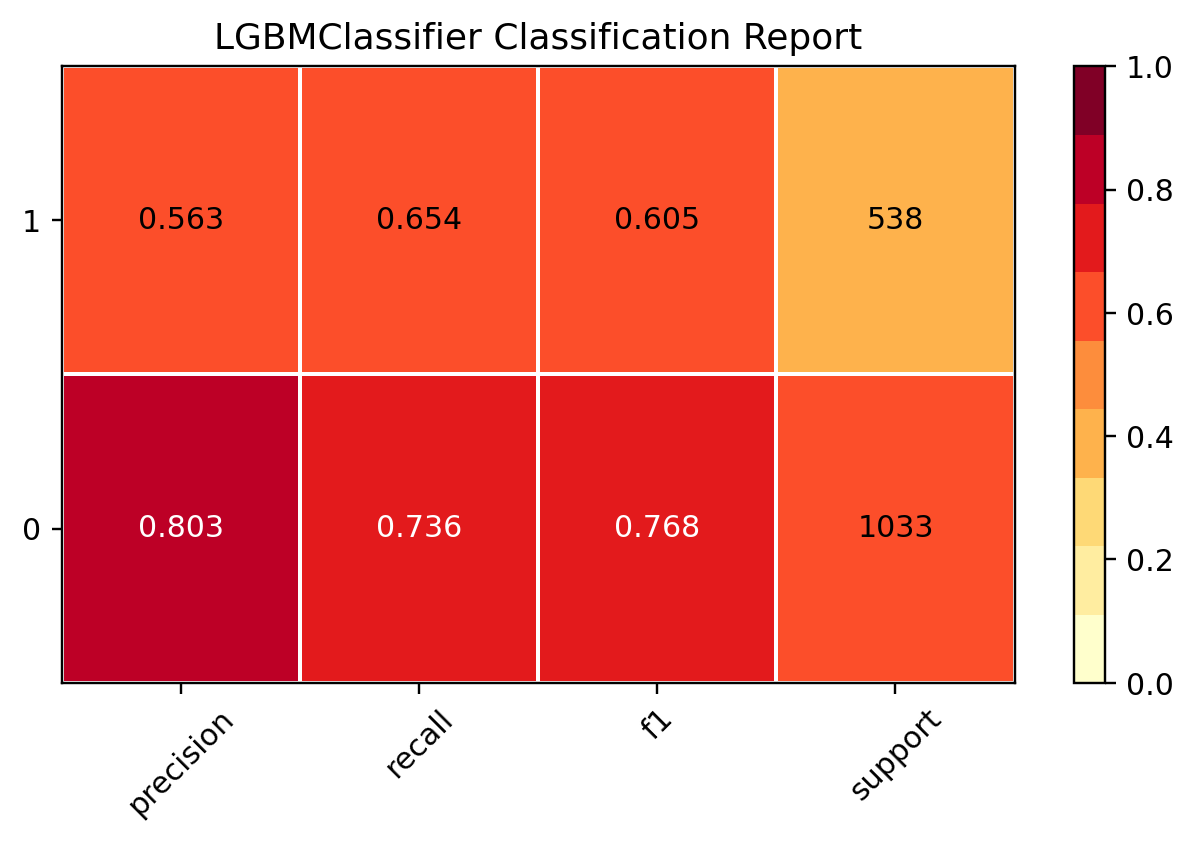

In [ ]:
# Gráfico del reporte de clasificación por label
plot_model(lightgbm_model, plot = 'class_report', save = False, scale = 3)

*En este gráfico del reporte de clasificación podemos ver lo que vimos antes en la matriz de confusión: que las métricas son mucho más altas en una clase (0 o "desaparecido") que en otra (1 o "apareció").*

In [ ]:
# Finalizar el modelo
finalize_model(lightgbm_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Guardar el modelo (o volverlo a cargar)
# model = load_model('lightgbm_model') # To reload model
save_model(lightgbm_model, 'lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['ID', 'status', 'año'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='aparecio',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerica...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sam

In [ ]:
# Ver predicciones en los datos de prueba
predict_model(lightgbm_model, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7078,0.7749,0.6543,0.5632,0.6053,0.3754,0.3781


,edad,escolaridad,vulnerabilidad,municipio,dias,sexo_Mujer,relacion_actual,relacion_ninguna,relacion_pasada,aparecio,Label,Score_0,Score_1
0,-0.891738,-4.088505e-08,1.0,-0.921678,0.880295,1.0,0.0,1.0,0.0,0,0,0.9584,0.0416
1,3.034565,-4.088505e-08,0.0,-0.795553,0.512076,0.0,0.0,1.0,0.0,0,0,0.9807,0.0193
2,-0.042808,1.143073e-02,0.0,-0.926680,0.841944,0.0,1.0,0.0,0.0,0,0,0.9698,0.0302
3,0.063308,-4.088505e-08,0.0,-0.267537,-0.751164,0.0,0.0,1.0,0.0,0,1,0.4418,0.5582
4,-1.210087,3.378955e+00,0.0,-0.250114,0.569343,0.0,1.0,0.0,0.0,0,0,0.9172,0.0828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,-0.891738,-4.088505e-08,0.0,-0.794495,-0.397457,1.0,0.0,1.0,0.0,1,1,0.3735,0.6265
1567,0.593890,1.695193e+00,1.0,1.308581,-0.553451,0.0,1.0,0.0,0.0,0,0,0.7503,0.2497
1568,1.548937,-1.672331e+00,0.0,1.308581,-0.412746,1.0,0.0,0.0,1.0,1,1,0.1750,0.8250
1569,-0.997855,-4.088505e-08,0.0,-0.775770,1.293601,0.0,1.0,0.0,0.0,1,0,0.8219,0.1781


#### **b. Light Gradient Boosting Machine (LGBM) – Muestra completa**

In [ ]:
# Instalar paquete de LGBM, ya que no viene con Scikit Learn
!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
# Correr y ajustar el modelo
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train_proc, y_train_enc)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Predicción
pred = model.predict(X_test_proc)
accuracy = model.score(X_test_proc, y_test_enc)
print(accuracy)

0.7008274984086569


In [ ]:
# Reporte de clasificación en los datos de entrenamiento (para evaluar la
# varianza)
pred_train = model.predict(X_train_proc)
target_names = ['Continúa desaparecido', 'Aparece']
print("Desempeño con datos de entrenamiento:" , "\n",
      classification_report(y_train_enc, pred_train, target_names = target_names))

In [ ]:
# Reporte de clasificación en los datos de testeo
print("Desempeño con datos de testeo:" , "\n",
      classification_report(y_test_enc, pred, target_names = target_names))

Desempeño con datos de testeo: 
                        precision    recall  f1-score   support

Continúa desaparecido       0.76      0.80      0.78      1033
              Aparece       0.57      0.51      0.54       538

             accuracy                           0.70      1571
            macro avg       0.66      0.66      0.66      1571
         weighted avg       0.69      0.70      0.70      1571



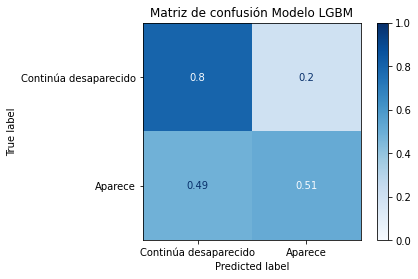

In [ ]:
# Matriz de confusión: Datos de testeo
sns.reset_orig()
cm = confusion_matrix(y_test_enc, pred, normalize = 'true',
                           labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
disp.ax_.get_images()[0].set_clim(0, 1)
plt.title("Matriz de confusión Modelo LGBM")
#plt.savefig('confusion_matrix_lgbm_todos.png', dpi = 300, figsize = (8, 11),
#            bbox_inches = 'tight')

Text(0.5, 1.0, 'Curva ROC Modelo LGBM')

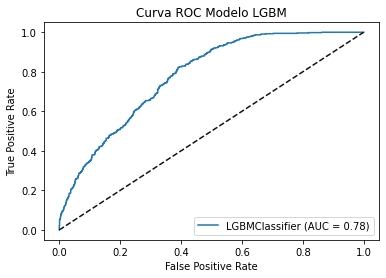

In [ ]:
# Curva ROC: Datos de testeo
plot_roc_curve(model, X_test_proc, y_test_enc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Modelo LGBM")
#plt.savefig('roc_curve_lgbm_todos.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Evaluación del modelo en los datos de prueba (Resumen)
print("Métricas de evaluación del modelo LGBM:", "\n"
      "accuracy  =", np.around(accuracy_score(y_test_enc, pred),
                               2), "\n"
      "precision =", np.around(precision_score(y_test_enc, pred),
                               2), "\n"
      "recall    =", np. around(recall_score(y_test_enc, pred),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(y_test_enc, pred),
                               2), "\n"
      "F1 score  =", np.around(f1_score(y_test_enc, pred), 2))

Métricas de evaluación del modelo LGBM: 
accuracy  = 0.7 
precision = 0.57 
recall    = 0.51 
ROC AUC   = 0.66 
F1 score  = 0.54


*Así como habíamos visto antes con el análisis de PyCaret, el modelo LGBM tiene un muy buen desempeño en la clase que está más representada ("Continúa desaparecido") que en la clase menos representada ("Apareció"). A continuación se verán los resultados ajustando el balance de clases al reducir el número de muestras en la clase mayor.*

#### **c. LGBM – Datos de entrenamiento submuestrados**

In [ ]:
# Especificar modelo y mirar predicción
model_res = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(X_res, y_res)
model_res.score(X_test_proc, y_test_enc)

0.6804583068109484

In [ ]:
# Puntajes del modelo con datos remuestreados en los datos de testeo
pred_res = model_res.predict(X_test_proc)
print("Desempeño con datos de testeo (entrenamiento sub-muestreado):" , "\n",
      classification_report(y_test_enc, pred_res,
                            target_names = target_names))

Desempeño con datos de testeo (entrenamiento sub-muestreado): 
                        precision    recall  f1-score   support

Continúa desaparecido       0.85      0.63      0.72      1033
              Aparece       0.52      0.78      0.63       538

             accuracy                           0.68      1571
            macro avg       0.68      0.70      0.67      1571
         weighted avg       0.74      0.68      0.69      1571



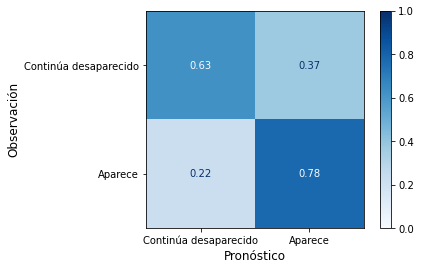

In [ ]:
# Matriz de confusión: Datos de testeo
sns.reset_orig()
cm = confusion_matrix(y_test_enc, pred_res, normalize = 'true',
                           labels = model_res.classes_)
disp_res = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = target_names)
disp_res.plot(cmap = plt.cm.Blues)
disp_res.ax_.get_images()[0].set_clim(0, 1)
plt.xlabel("Pronóstico", size = 12)
plt.ylabel("Observación", size = 12)
#plt.title("Matriz de confusión Modelo LGBM Submuestreo")
#plt.savefig('confusion_matrix_lgbm_sub.png', dpi = 300, figsize = (8, 11),
#            bbox_inches = 'tight')

Text(0.5, 1.0, 'Curva ROC Modelo LGBM Submuestreo')

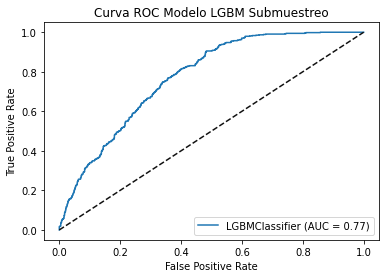

In [ ]:
# Curva ROC: Datos de testeo
plot_roc_curve(model_res, X_test_proc, y_test_enc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Modelo LGBM Submuestreo")
#plt.savefig('roc_curve_lgbm_todos.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Evaluación del modelo en los datos de prueba (Macro)
print("Métricas de evaluación del modelo LGBM Submuestreo:", "\n"
      "accuracy  =", np.around(accuracy_score(y_test_enc, pred_res),
                               2), "\n"
      "precision =", np.around(precision_score(y_test_enc, pred_res),
                               2), "\n"
      "recall    =", np. around(recall_score(y_test_enc, pred_res),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(y_test_enc, pred_res),
                               2), "\n"
      "F1 score  =", np.around(f1_score(y_test_enc, pred_res), 2))

Métricas de evaluación del modelo LGBM Submuestreo: 
accuracy  = 0.68 
precision = 0.52 
recall    = 0.78 
ROC AUC   = 0.7 
F1 score  = 0.63


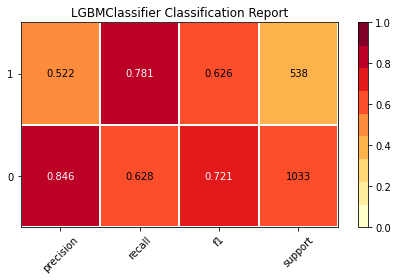

In [ ]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(model_res, classes = model_res.classes_,
                                  support = True)
visualizer.fit(X_train_proc, y_train_enc)  # Fit the visualizer and the model
visualizer.score(X_test_proc, y_test_enc)  # Evaluate the model on the test data
fig = visualizer.show(outpath = "LGBMSubmuestreo_class_report.png")
f = plt.gcf() 
f.savefig('LGBMSubmuestreo_class_report.png', dpi = 300, bbox_inches = 'tight')

 99%|===================| 4273/4302 [00:16<00:00]       

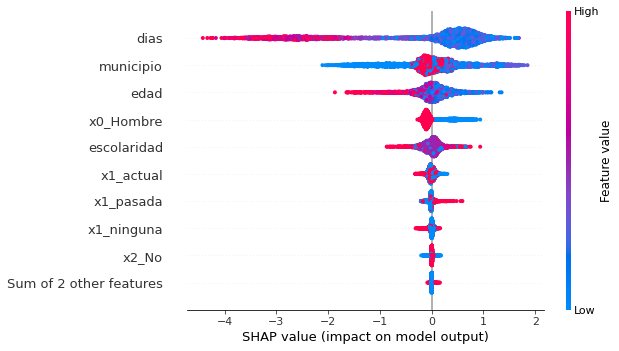

In [ ]:
# Graficar y guardar las features con los SHAP values
explainer = shap.Explainer(model_res, X_res)
shap_values = explainer(X_res)
fig = shap.plots.beeswarm(shap_values, show = False)
f = plt.gcf() 
f.savefig('shap_lightgbm_undersampling.png', dpi = 300, bbox_inches = 'tight')

*Con respecto al modelo LGBM con los datos originales completos, vemos que este modelo LGBM sub-muestrado en los datos de entrenamiento tiene menor precisión y mayor recall (justo lo opuesto al modelo original). Sin embargo, vemos que se favorece más la predicción de interés, es decir, la de la clase "Apareció", con 81%.*

In [ ]:
# Probabilidades para cada registro de los datos de testeo
probabilidades = model_res.predict_proba(X_test_proc)
prob_aparecer = pd.DataFrame(probabilidades, index = X_test_proc.index,
                             columns = ["prob_desaparec_pred", "prob_aparec_pred"])
prob_aparecer_x_y = pd.concat([X_test, prob_aparecer,
                               pd.DataFrame(y_test_enc, index = y_test.index,
                                            columns = ["aparecio"])],
                              axis = 1)
prob_aparecer_x_y

,edad,sexo,escolaridad,vulnerabilidad,municipio,dias,relacion,prob_desaparec_pred,prob_aparec_pred,aparecio
149087,63,Mujer,4.966056,Sí,36708.0,7872,ninguna,0.944344,0.055656,0
10621,100,Hombre,4.966056,No,491387.0,6451,ninguna,0.977852,0.022148,0
84654,71,Hombre,5.000000,No,18678.0,7724,actual,0.937428,0.062572,0
123355,72,Hombre,4.966056,No,2394870.0,1576,ninguna,0.307530,0.692470,0
82512,60,Hombre,15.000000,No,2457680.0,6672,actual,0.861568,0.138432,0
...,...,...,...,...,...,...,...,...,...,...
84409,63,Mujer,4.966056,No,495200.0,2941,ninguna,0.418575,0.581425,1
101399,77,Hombre,10.000000,Sí,8076734.0,2339,actual,0.487001,0.512999,0
85655,86,Mujer,0.000000,No,8076734.0,2882,pasada,0.195247,0.804753,1
24131,62,Hombre,4.966056,No,562704.0,9467,actual,0.749354,0.250646,1


In [ ]:
# Guardar el modelo para cargarlo después
filename = 'finalized_lgbm_model.pkl'
with open(filename, 'wb') as file:  
    pickle.dump(model_res, file)

#### **d. SMOTE: Oversampling**

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2021)
X_train_res, y_train_res = sm.fit_sample(X_train_proc, y_train_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 2151
Before OverSampling, counts of label '0': 4133 

After OverSampling, the shape of train_X: (8266, 11)
After OverSampling, the shape of train_y: (8266,) 

After OverSampling, counts of label '1': 4133
After OverSampling, counts of label '0': 4133


In [ ]:
# Correr y ajustar el modelo
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train_res, y_train_res)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2021, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Predicción
pred = model.predict(X_test_proc)
accuracy = model.score(X_test_proc, y_test_enc)
print(accuracy)

0.6836409929980903


In [ ]:
# Reporte de clasificación en los datos de testeo
print("Desempeño con datos de testeo:" , "\n",
      classification_report(y_test_enc, pred, target_names = target_names))

Desempeño con datos de testeo: 
                        precision    recall  f1-score   support

Continúa desaparecido       0.81      0.68      0.74      1033
              Aparece       0.53      0.70      0.60       538

             accuracy                           0.68      1571
            macro avg       0.67      0.69      0.67      1571
         weighted avg       0.71      0.68      0.69      1571



Text(0.5, 1.0, 'Matriz de confusión Modelo LGBM Smote')

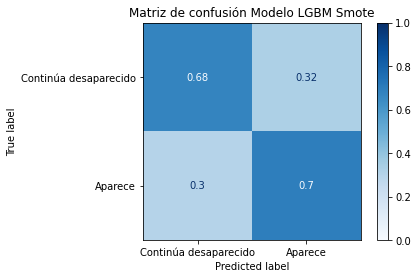

In [ ]:
# Matriz de confusión: Datos de testeo
sns.reset_orig()
cm = confusion_matrix(y_test_enc, pred, normalize = 'true',
                           labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
disp.ax_.get_images()[0].set_clim(0, 1)
plt.title("Matriz de confusión Modelo LGBM Smote")
#plt.savefig('confusion_matrix_lgbm_SMOTE.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

Text(0.5, 1.0, 'Curva ROC Modelo LGBM Smote')

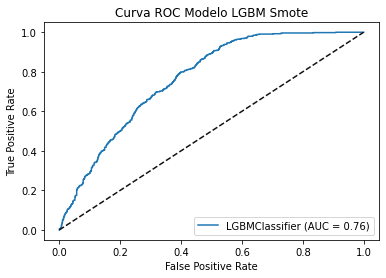

In [ ]:
# Curva ROC: Datos de testeo
plot_roc_curve(model, X_test_proc, y_test_enc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Modelo LGBM Smote")
#plt.savefig('roc_curve_lgbm_smote.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Evaluación del modelo en los datos de prueba (Resumen)
print("Métricas de evaluación del modelo LGBM:", "\n"
      "accuracy  =", np.around(accuracy_score(y_test_enc, pred),
                               2), "\n"
      "precision =", np.around(precision_score(y_test_enc, pred),
                               2), "\n"
      "recall    =", np. around(recall_score(y_test_enc, pred),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(y_test_enc, pred),
                               2), "\n"
      "F1 score  =", np.around(f1_score(y_test_enc, pred), 2))

Métricas de evaluación del modelo LGBM: 
accuracy  = 0.68 
precision = 0.53 
recall    = 0.7 
ROC AUC   = 0.69 
F1 score  = 0.6


#### **e. Gradient Boosting Classifier – Muestra completa**

In [ ]:
# Especificar modelo y mirar predicción
clf = GradientBoostingClassifier(random_state = 2021).fit(X_train_proc,
                                                          y_train_enc)
clf.score(X_test_proc, y_test_enc)

0.7065563335455124

In [ ]:
# Reporte de clasificación en los datos de entrenamiento (para evaluar la
# varianza)
pred_train = clf.predict(X_train_proc)
print("Desempeño con datos de entrenamiento:" , "\n",
      classification_report(y_train_enc, pred_train, target_names = target_names))

Desempeño con datos de entrenamiento: 
                        precision    recall  f1-score   support

Continúa desaparecido       0.79      0.84      0.81      4133
              Aparece       0.65      0.57      0.61      2151

             accuracy                           0.75      6284
            macro avg       0.72      0.70      0.71      6284
         weighted avg       0.74      0.75      0.74      6284



In [ ]:
# Reporte de clasificación en los datos de testeo
y_pred_test = clf.predict(X_test_proc)
print("Desempeño con datos de testeo:" , "\n",
      classification_report(y_test_enc, y_pred_test, target_names = target_names))

Desempeño con datos de testeo: 
                        precision    recall  f1-score   support

Continúa desaparecido       0.76      0.80      0.78      1033
              Aparece       0.58      0.53      0.55       538

             accuracy                           0.71      1571
            macro avg       0.67      0.66      0.67      1571
         weighted avg       0.70      0.71      0.70      1571



*El puntaje de F1-score es más alto para la clase de "Continúa desaparecido" que para la clase "Aparece", tal vez porque refleja la diferencia similar que se observa en el recall.*

Text(0.5, 1.0, 'Matriz de confusión Modelo GBC')

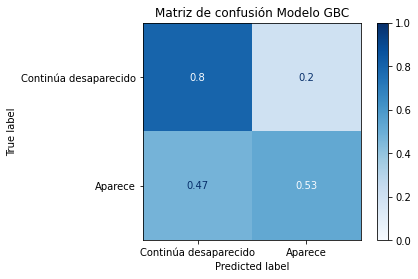

In [ ]:
# Matriz de confusión: Datos de testeo
cm_test = confusion_matrix(y_test_enc, y_pred_test, normalize = 'true',
                           labels = clf.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test,
                       display_labels = target_names)
disp_test.plot(cmap = plt.cm.Blues)
disp_test.ax_.get_images()[0].set_clim(0, 1)
plt.title("Matriz de confusión Modelo GBC")
#plt.savefig('confusion_matrix_gbc_todos.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

Text(0.5, 1.0, 'Curva ROC Modelo GBC')

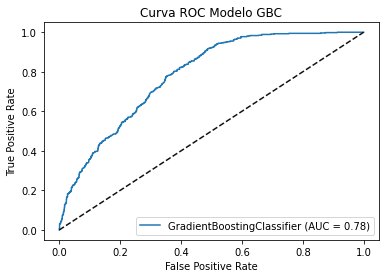

In [ ]:
# Curva ROC: Datos de testeo
plot_roc_curve(clf, X_test_proc, y_test_enc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Modelo GBC")
#plt.savefig('curva_roc_gbc_todos.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Evaluación del modelo en los datos de prueba (Resumen)
print("Métricas de evaluación del modelo GBC:", "\n"
      "accuracy  =", np.around(accuracy_score(y_test_enc, y_pred_test),
                               2), "\n"
      "precision =", np.around(precision_score(y_test_enc, y_pred_test),
                               2), "\n"
      "recall    =", np. around(recall_score(y_test_enc, y_pred_test),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(y_test_enc, y_pred_test),
                               2), "\n"
      "F1 score  =", np.around(f1_score(y_test_enc, y_pred_test), 2))

Métricas de evaluación del modelo GBC: 
accuracy  = 0.71 
precision = 0.58 
recall    = 0.53 
ROC AUC   = 0.66 
F1 score  = 0.55


*En la matriz de confusión vemos que el recall es mucho más alto para la clase "Continúa desaparecido" que para la clase "Aparece", para la cual el recall es casi chance.*

#### **f. Gradient Boosting Classifier – Datos de entrenamiento submuestrados**

In [ ]:
# Especificar modelo y mirar predicción
clf_res = GradientBoostingClassifier(random_state = 2021).fit(X_res, y_res)
clf_res.score(X_test_proc, y_test_enc)

0.671546785486951

*El puntaje de clasificación es menor que con los datos "originales" y ligeramente más alto (0.01) que el modelo LGBM sub-muestreado.*

In [ ]:
# Puntajes del modelo con datos remuestreados en los datos de testeo
y_pred_test = clf_res.predict(X_test_proc)
print("Desempeño con datos de testeo:" , "\n",
      classification_report(y_test_enc, y_pred_test,
                            target_names = target_names))

Desempeño con datos de testeo: 
                        precision    recall  f1-score   support

Continúa desaparecido       0.87      0.59      0.70      1033
              Aparece       0.51      0.83      0.63       538

             accuracy                           0.67      1571
            macro avg       0.69      0.71      0.67      1571
         weighted avg       0.75      0.67      0.68      1571



Text(0.5, 1.0, 'Matriz de confusión Modelo GBC Submuestreo')

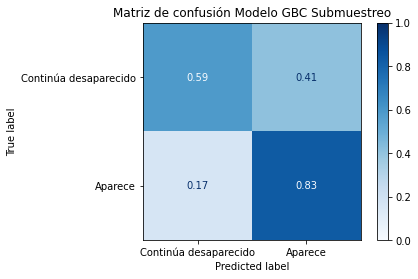

In [ ]:
# Matriz de confusión: Datos de testeo
cm_test = confusion_matrix(y_test_enc, y_pred_test, normalize = 'true',
                           labels = clf_res.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test,
                       display_labels = target_names)
disp_test.plot(cmap = plt.cm.Blues)
disp_test.ax_.get_images()[0].set_clim(0, 1)
plt.title("Matriz de confusión Modelo GBC Submuestreo")
#plt.savefig('matriz_confusion_gbc_sub.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

Text(0.5, 1.0, 'Curva ROC Modelo GBC Submuestreo')

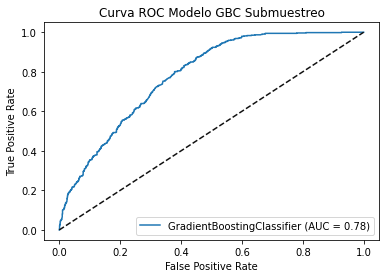

In [ ]:
# Curva ROC: Datos de testeo
plot_roc_curve(clf_res, X_test_proc, y_test_enc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Modelo GBC Submuestreo")
#plt.savefig('curva_roc_gbc_sub.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Evaluación del modelo en los datos de prueba (Resumen)
print("Métricas de evaluación del modelo GBC Submuestreo:", "\n"
      "accuracy  =", np.around(accuracy_score(y_test_enc, y_pred_test),
                               2), "\n"
      "precision =", np.around(precision_score(y_test_enc, y_pred_test),
                               2), "\n"
      "recall    =", np. around(recall_score(y_test_enc, y_pred_test),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(y_test_enc, y_pred_test),
                               2), "\n"
      "F1 score  =", np.around(f1_score(y_test_enc, y_pred_test), 2))

Métricas de evaluación del modelo GBC Submuestreo: 
accuracy  = 0.67 
precision = 0.51 
recall    = 0.83 
ROC AUC   = 0.71 
F1 score  = 0.63


*En la matriz de confusión vemos que el recall ahora es mejor en la clase "Aparece" que en la de "Continúa desaparecido" (mientras que es lo opuesto con todos los registros). El área bajo la curva ROC, en cambio, permanece igual independendiente de si hay o no balance de clases. Aunque se gana en el F1 score de la clase "Aparece" (antes: 0.56), se pierde en la precisión (antes: 0.60). El puntaje recall se invirtió (antes: 0.52 Apareció y 0.82 Continúa desaparecido). Se reduce ligeramente el puntaje de accuracy.*

#### **g. Random Forest Classifier – Muestra completa**

In [ ]:
# Tercer mejor modelo, también uno que es menos sensible al desbalance de
# clases
rf_clf = RandomForestClassifier(random_state = 2021)
rf_clf.fit(X_train_proc, y_train_enc)
rf_clf.score(X_test_proc, y_test_enc)

0.6855506047103755

In [ ]:
# Reporte de clasificación en los datos de entrenamiento
# (para evaluar la varianza)
rf_y_pred_train = rf_clf.predict(X_train_proc)
print("Desempeño con datos de entrenamiento:" , "\n",
      classification_report(y_train_enc, rf_y_pred_train,
                            target_names = target_names))

Desempeño con datos de entrenamiento: 
                        precision    recall  f1-score   support

Continúa desaparecido       1.00      1.00      1.00      4133
              Aparece       1.00      1.00      1.00      2151

             accuracy                           1.00      6284
            macro avg       1.00      1.00      1.00      6284
         weighted avg       1.00      1.00      1.00      6284



In [ ]:
# Reporte de clasificación en los datos de testeo
rf_y_pred_test = rf_clf.predict(X_test_proc)
print("Desempeño con datos de testeo:" , "\n",
      classification_report(y_test_enc, rf_y_pred_test,
                            target_names = target_names))

Desempeño con datos de testeo: 
                        precision    recall  f1-score   support

Continúa desaparecido       0.75      0.79      0.77      1033
              Aparece       0.55      0.49      0.52       538

             accuracy                           0.69      1571
            macro avg       0.65      0.64      0.64      1571
         weighted avg       0.68      0.69      0.68      1571



*Observamos overfitting de este modelo, ya que los puntajes son perfectos en los datos de entrenamiento, pero decrecen mucho en los datos de testeo. En los datos de testeo, a diferencia de los resultados con los dos modelos anteriores, tanto la precisión como el recall de la clase "Aparece" son bajos (mientras que en los otros modelos, sólo uno de los dos es bajo)*

Text(0.5, 1.0, 'Matriz de confusión Modelo Random Forest')

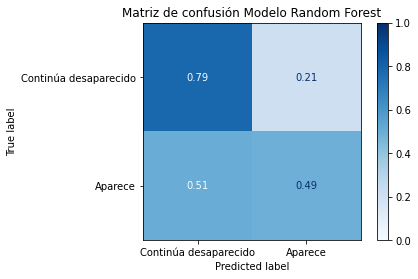

In [ ]:
# Matriz de confusión y curva ROC: Datos de testeo
rf_cm_test = confusion_matrix(y_test_enc, rf_y_pred_test, normalize = 'true',
                           labels = rf_clf.classes_)
rf_disp_test = ConfusionMatrixDisplay(confusion_matrix = rf_cm_test,
                       display_labels = target_names)
rf_disp_test.plot(cmap = plt.cm.Blues)
rf_disp_test.ax_.get_images()[0].set_clim(0, 1)
plt.title("Matriz de confusión Modelo Random Forest")
#plt.savefig('matriz_confusion_rf_todos.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

Text(0.5, 1.0, 'Curva ROC Modelo Random Forest')

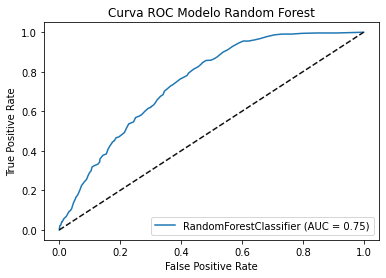

In [ ]:
# Curva ROC: Datos de testeo
plot_roc_curve(rf_clf, X_test_proc, y_test_enc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Modelo Random Forest")
#plt.savefig('curva_roc_rf_todos.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Evaluación del modelo en los datos de prueba (Resumen)
print("Métricas de evaluación del modelo RF:", "\n"
      "accuracy  =", np.around(accuracy_score(y_test_enc, rf_y_pred_test),
                               2), "\n"
      "precision =", np.around(precision_score(y_test_enc, rf_y_pred_test),
                               2), "\n"
      "recall    =", np. around(recall_score(y_test_enc, rf_y_pred_test),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(y_test_enc, rf_y_pred_test),
                               2), "\n"
      "F1 score  =", np.around(f1_score(y_test_enc, rf_y_pred_test), 2))

Métricas de evaluación del modelo RF: 
accuracy  = 0.69 
precision = 0.55 
recall    = 0.49 
ROC AUC   = 0.64 
F1 score  = 0.52


#### **h. Random Forest Classifier – Datos de entrenamiento submuestreados**

In [ ]:
# Especificar modelo y mirar predicción
rf_res = RandomForestClassifier(random_state = 2021).fit(X_res, y_res)
rf_res.score(X_test_proc, y_test_enc)

0.6740929344366645

In [ ]:
# Puntajes del modelo con datos remuestreados en los datos de testeo
y_pred_rf = rf_res.predict(X_test_proc)
print("Desempeño con datos de testeo:" , "\n",
      classification_report(y_test_enc, y_pred_rf,
                            target_names = target_names))

Desempeño con datos de testeo: 
                        precision    recall  f1-score   support

Continúa desaparecido       0.82      0.65      0.72      1033
              Aparece       0.52      0.72      0.60       538

             accuracy                           0.67      1571
            macro avg       0.67      0.69      0.66      1571
         weighted avg       0.72      0.67      0.68      1571



Text(0.5, 1.0, 'Matriz de confusión Modelo Random Forest Submuestreo')

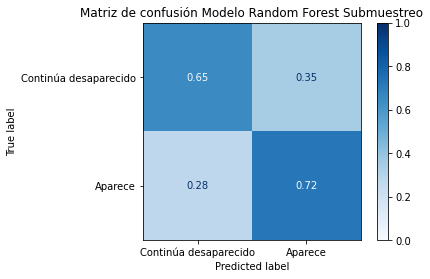

In [ ]:
# Matriz de confusión: Datos de testeo
cm_test = confusion_matrix(y_test_enc, y_pred_rf, normalize = 'true',
                           labels = rf_res.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test,
                       display_labels = target_names)
disp_test.plot(cmap = plt.cm.Blues)
disp_test.ax_.get_images()[0].set_clim(0, 1)
plt.title("Matriz de confusión Modelo Random Forest Submuestreo")
#plt.savefig('matriz_confusion_rf_sub.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

Text(0.5, 1.0, 'Curva ROC Modelo Random Forest Submuestreo')

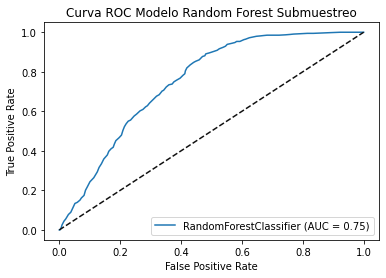

In [ ]:
# Curva ROC: Datos de testeo
plot_roc_curve(rf_res, X_test_proc, y_test_enc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC Modelo Random Forest Submuestreo")
#plt.savefig('curva_roc_rf_sub.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Evaluación del modelo en los datos de prueba (Resumen)
print("Métricas de evaluación del modelo RF:", "\n"
      "accuracy  =", np.around(accuracy_score(y_test_enc, y_pred_rf),
                               2), "\n"
      "precision =", np.around(precision_score(y_test_enc, y_pred_rf),
                               2), "\n"
      "recall    =", np. around(recall_score(y_test_enc, y_pred_rf),
                                2), "\n"
      "ROC AUC   =", np.around(roc_auc_score(y_test_enc, y_pred_rf),
                               2), "\n"
      "F1 score  =", np.around(f1_score(y_test_enc, y_pred_rf), 2))

Métricas de evaluación del modelo RF: 
accuracy  = 0.67 
precision = 0.52 
recall    = 0.72 
ROC AUC   = 0.69 
F1 score  = 0.6


*En el caso de Random Forest es bastante notorio que el resultado de clasificación mejora de manera sustancial en casi todas las métricas cuando las clases están balanceadas.*

#### **i. Importancia de las features basado en el mejor modelo**
– LGBM con datos de entrenamiento submuestrados

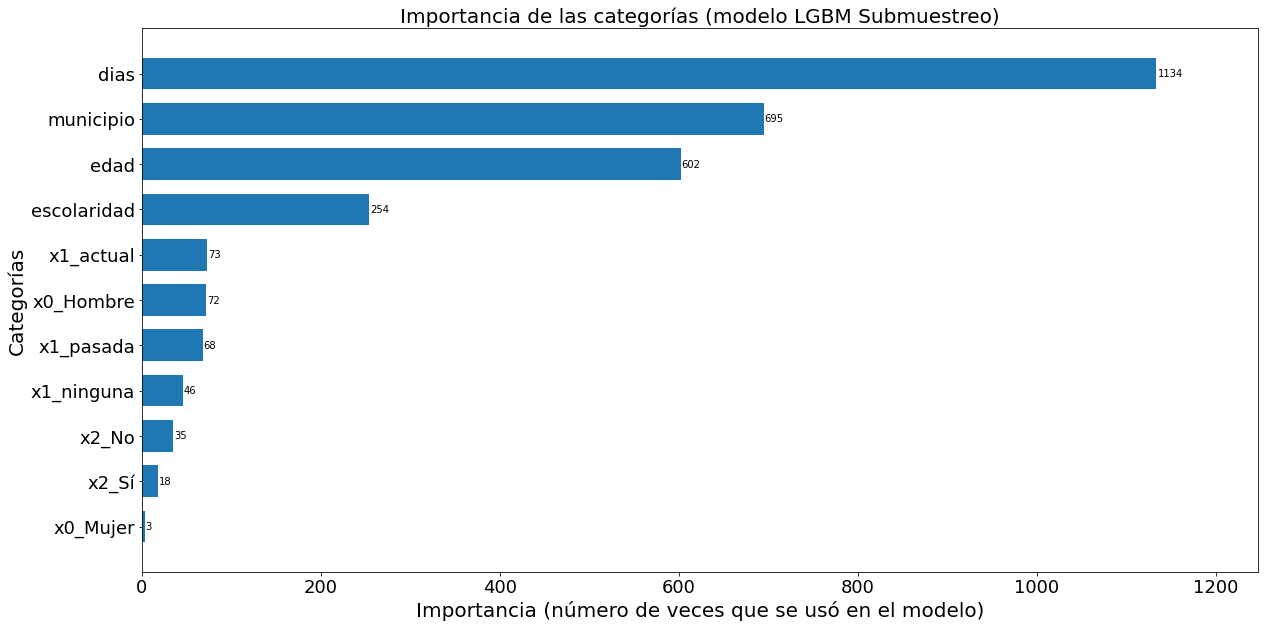

In [ ]:
# Gráfico de barras de la importancia relativa de las categorías del modelo
lgb.plot_importance(model_res, figsize = (20, 10), grid = False,
                    xlabel = "Importancia", ylabel = "Categorías", height = 0.7)
plt.xlabel("Importancia (número de veces que se usó en el modelo)", size = 20)
plt.ylabel("Categorías", size = 20)
plt.title("Importancia de las categorías (modelo LGBM Submuestreo)", size = 20)
plt.yticks(size = 18)
plt.xticks(size = 18)
plt.savefig('feature_importance_lgbm.png', dpi = 300, figsize = (8, 11),
            bbox_inches = 'tight')

#### **j. Prueba en datos nunca antes vistos**

In [ ]:
# Se cargan los datos ya preprocessados en el Notebook
# "Desaparecidos_unseen.ipynb"
unseen = pd.read_csv("https://drive.google.com/uc?id=1-30ZnuObeyflNP85tu4u0eWiQqNEepwG")
unseen

,ID,status,edad,sexo,escolaridad,vulnerabilidad,municipio,dias,relacion,aparecio
0,162461,Aparecio Vivo,69,Hombre,2.5,No,5348.0,152,NaN,1
1,162472,Desaparecido,73,Hombre,10.0,No,8076734.0,150,actual,0
2,162484,Aparecio Vivo,91,Hombre,5.0,No,8076734.0,150,actual,1
3,162498,Desaparecido,76,Hombre,7.5,No,8076734.0,149,ninguna,0
4,162502,Aparecio Vivo,61,Hombre,5.0,No,8076734.0,152,actual,1
5,162526,Desaparecido,76,Hombre,5.0,No,8076734.0,152,pasada,0
6,162535,Desaparecido,61,Hombre,10.0,No,8076734.0,148,ninguna,0
7,162540,Aparecio Vivo,73,Mujer,5.0,No,8076734.0,147,pasada,1
8,162553,Desaparecido,72,Hombre,0.0,No,8076734.0,147,actual,0
9,162583,Desaparecido,74,Hombre,NaN,No,122030.0,152,NaN,0


In [ ]:
# Separamos los datos
Xnew = unseen.drop(["status", "ID", "aparecio"], axis = 1)
ynew = unseen["aparecio"].copy()

In [ ]:
# Imputamos los valores perdidos según los datos de entrenamiento
Xnew['escolaridad'] = Xnew['escolaridad'].replace(np.nan, X_train['escolaridad'].mean())
Xnew['municipio'] = Xnew['municipio'].fillna(X_train.loc[:, 'municipio'].mean())
Xnew['vulnerabilidad'] = Xnew['vulnerabilidad'].fillna(X_train.loc[:, 'vulnerabilidad'].mode()[0])
Xnew['relacion'] = Xnew['relacion'].fillna(X_train.loc[:, 'relacion'].mode()[0])
Xnew.isnull().sum()

edad              0
sexo              0
escolaridad       0
vulnerabilidad    0
municipio         0
dias              0
relacion          0
dtype: int64

In [ ]:
# Aplicamos Encoding
encoded_columns_unseen = enc.transform(Xnew[categorical_features]).toarray()
data_hot_encoded_unseen = pd.DataFrame(encoded_columns_unseen,
                                       index = unseen.index,
                                columns = enc.get_feature_names())
scaler_columns_unseen = scaler.transform(Xnew[numeric_features])
data_scaled_unseen = pd.DataFrame(scaler_columns_unseen, index = Xnew.index,
                           columns = numeric_features)
X_new_proc = pd.concat([data_hot_encoded_unseen, data_scaled_unseen], axis = 1)
y_new_enc = le.transform(ynew)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0])

In [ ]:
# Desempeño con los datos nuevos
pred_unseen = model_res.predict(X_new_proc)
print("Desempeño con datos nuevos (entrenamiento sub-muestreado):" , "\n",
      classification_report(y_new_enc, pred_unseen,
                            target_names = target_names))

Desempeño con datos nuevos (entrenamiento sub-muestreado): 
                        precision    recall  f1-score   support

Continúa desaparecido       0.76      0.44      0.56        63
              Aparece       0.38      0.70      0.49        30

             accuracy                           0.53        93
            macro avg       0.57      0.57      0.52        93
         weighted avg       0.63      0.53      0.54        93



Text(0.5, 1.0, 'Matriz de confusión Modelo LGBM datos nuevos')

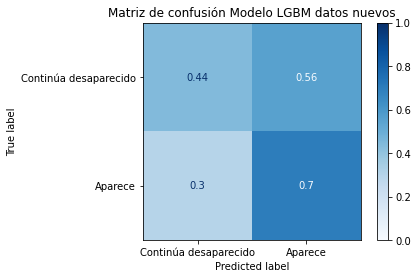

In [ ]:
# Matriz de confusión: Datos nuevos
sns.reset_orig()
cm_new = confusion_matrix(y_new_enc, pred_unseen, normalize = 'true',
                           labels = model_res.classes_)
disp_new = ConfusionMatrixDisplay(confusion_matrix = cm_new,
                       display_labels = target_names)
disp_new.plot(cmap = plt.cm.Blues)
disp_new.ax_.get_images()[0].set_clim(0, 1)
plt.title("Matriz de confusión Modelo LGBM datos nuevos")
#plt.savefig('matriz_confusion_unseen.png', dpi = 200, figsize = (8, 11),
#            bbox_inches = 'tight')

In [ ]:
# Probabilidades para cada registro de los datos nuevos
probabilidades_new = model_res.predict_proba(X_new_proc)
prob_aparecer_new = pd.DataFrame(probabilidades_new, index = X_new_proc.index,
                             columns = ["prob_desaparec_pred", "prob_aparec_pred"])
prob_aparecer_x_y_new = pd.concat([Xnew, prob_aparecer_new,
                               pd.DataFrame(y_new_enc, index = ynew.index,
                                            columns = ["aparecio"])],
                              axis = 1)
prob_aparecer_x_y_new

,edad,sexo,escolaridad,vulnerabilidad,municipio,dias,relacion,prob_desaparec_pred,prob_aparec_pred,aparecio
0,69,Hombre,2.500000,No,5.348000e+03,152,actual,0.395853,0.604147,1
1,73,Hombre,10.000000,No,8.076734e+06,150,actual,0.295671,0.704329,0
2,91,Hombre,5.000000,No,8.076734e+06,150,actual,0.594669,0.405331,1
3,76,Hombre,7.500000,No,8.076734e+06,149,ninguna,0.428235,0.571765,0
4,61,Hombre,5.000000,No,8.076734e+06,152,actual,0.389177,0.610823,1
5,76,Hombre,5.000000,No,8.076734e+06,152,pasada,0.524417,0.475583,0
6,61,Hombre,10.000000,No,8.076734e+06,148,ninguna,0.503226,0.496774,0
7,73,Mujer,5.000000,No,8.076734e+06,147,pasada,0.333359,0.666641,1
8,72,Hombre,0.000000,No,8.076734e+06,147,actual,0.389371,0.610629,0
9,74,Hombre,4.966056,No,1.220300e+05,152,actual,0.639750,0.360250,0


### **12 Conclusión**
---

En conclusión, el mejor modelo de predicción de aparición es el Light Gradient Boosting Machine basado en datos de entrenamiento balanceados (es decir, 50% desaparecidos y 50% aparecidos).

Se escoge este modelo basado en la métrica de *recall* o sensibilidad, la cual representa la tasa predictiva verdadera, que es lo que más nos interesa, dado que nos interesa identificar de manera exacta aquellos casos que van a aparecer. En este sentido, el modelo predice con 78% de sensibilidad aquellos casos que van a aparecer sin sacrificar la precisión (53%) o la exactitud (69%), las cuales representan una mejora con respecto al modelo base.

Para dar respuesta a la pregunta principal del proyecto, acerca de los factores que predicen la aparición de una persona mayor reportada como desaparecida, éstos son el tiempo transcurrido, el tamaño de la población donde ocurrió la desaparición, la edad y la escolaridad. En cambio, sexo, factor de vulnerabilidad o relación conyugal de la persona desaparecida no parecen tener ningún efecto sobre la probabilidad de aparición, al menos en personas mayores.

Estos resultados apuntan a que se necesitan variables más precisas (p. ej., cuantitativas) y que aporten mayor especificidad con respecto al caso (p. ej., no tan generales como el estado civil o tan únicas como el tipo de vulnerabilidad). En este sentido, otras variables que podrían ayudar en la predicción y podrían estudiarse en un futuro son, por ejemplo, quién realiza el reporte de desaparición, una medida más precisa de años de escolaridad (ya que aquí tuvieron que ser inferidos), número de personas en el hogar de la persona desaparecida (si aplica), presencia o no de condiciones médicas o psiquiátricas y cuántas, estrato socioeconómico de la persona desaparecida, etc.